# Housing Exploratory Data Analysis

## Overview 
This is a GTA Housing dataset from TREB (Toronto Real Estate Board). The dataset was aggregated from a script I created and it consists of time series data ranging from 1996 to 2020 for several municipalities/communities and home types.

The data may help us to answer the following questions:
- Which munipalities/communities are performing better and for which home types?
- What is the trend for average price, sales, etc and how does it vary across home types and communities?
- Is there seasonality?
    - Are more people buying in the summer or winter?
    - Is there a pattern to when it's a buyers' market vs sellers' market and vice versa?
- Which home types have experienced the best ROI? Which combination of community/home type has the steepest ROI?
- Which munipalities have the most sales?
- Prediction: Which community/home type combination would give you the best ROI?
- Prediction: When is the best time to buy? When is the best time to sell? When will dips happen (if any) and when will climbs happen?


## Data Dictionary
Sales - # of Home sales Dollar Volume - Total amount paid for homes in dollars

Average Price - Dollar Volume/Sales

New Listings - # of new listings for the month

SNLR - Sales to New Listing Ratio: The ratio between the number of homes sold and the number of new listings entered into the system during the month. Fifty per cent represents a balanced market. A higher ratio indicates more of a Sellers’ market; a lower ratio indicates more of a Buyers’ market.

Active Listings - # of listings active in the month

MOI - Months on Inventory: The number of months it would take for all current listings (as of the end of each month) to sell. As the MOI moves higher, there are more Sellers than Buyers. As the MOI moves lower, there are more Buyers than Sellers (putting upward pressure on prices).

Average DOM - Average days on the market

Average SP/LP - Average Sold Price / Listing Price A higher ratio indicates more of a Sellers' market since people are paying more than asking. A lower ratio indicates more of a Buyers' market since people are paying less than asking.

## Imports

In [2]:
import pandas as pd
import numpy as np
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plt.style.use('classic')
%matplotlib inline

In [3]:
# helper functions
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

## Inspect Data

In [4]:
housing = pd.read_csv('MLS_Datasets/all_cities.csv')

In [5]:
housing = housing.drop(columns='Unnamed: 0')

In [6]:
housing

Date  Sales  Dollar Volume  Average Price  New Listings      SNLR  \
0       Jan '96    6.0       817900.0  136316.671875          19.0  0.315790   
1       Feb '96   11.0      1516750.0  137886.359375          27.0  0.407407   
2       Mar '96   23.0      3398400.0  147756.515625          23.0  1.000000   
3       Apr '96   20.0      2839800.0  141990.000000          33.0  0.606061   
4       May '96   26.0      3724800.0  143261.531250          36.0  0.722222   
...         ...    ...            ...            ...           ...       ...   
130975  Nov '20    3.0      2483900.0  827966.687500           5.0  0.600000   
130976  Dec '20    3.0      2590000.0  863333.312500           4.0  0.750000   
130977  Jan '21    7.0      6349800.0  907114.312500           7.0  1.000000   
130978  Feb '21    3.0      2960000.0  986666.687500           4.0  0.750000   
130979  Mar '21    9.0      8671000.0  963444.437500          17.0  0.529412   

        Active Listings       MOI  Average DOM  Average SP/LP Municipality  \
0                  42.0  7.000000    63.833332       0.958402     Dufferin   
1                  48.0  4.363637    72.181816       0.969682     Dufferin   
2                  38.0  1.652174    85.130432       0.968562     Dufferin   
3                  44.0  2.200000    36.750000       0.967134     Dufferin   
4                  42.0  1.615385    53.115383       0.967018     Dufferin   
...                 ...       ...          ...            ...          ...   
130975              3.0  1.000000     5.333334       1.031563         York   
130976              1.0  0.333333    11.000000       1.010929         York   
130977              1.0  0.142857     7.142857       1.085345         York   
130978              2.0  0.666667     1.666667       1.106956         York   
130979              5.0  0.555556     7.444445       1.105487         York   

                     Geography       HomeType  
0                  Orangeville     All values  
1                  Orangeville     All values  
2                  Orangeville     All values  
3                  Orangeville     All values  
4                  Orangeville     All values  
...                        ...            ...  
130975  Whitchurch-Stouffville  Semi-Detached  
130976  Whitchurch-Stouffville  Semi-Detached  
130977  Whitchurch-Stouffville  Semi-Detached  
130978  Whitchurch-Stouffville  Semi-Detached  
130979  Whitchurch-Stouffville  Semi-Detached  

[130980 rows x 13 columns]

In [7]:
print('The shape of the data is:', housing.shape ,'\n')
print('These are the columns of the data:', housing.columns.values, '\n')
print('The municipalities in the dataset are:', *housing['Municipality'].unique(), '\n')
print('The types of homes are:', housing['HomeType'].unique(), '\n')
print('The data is from',housing['Date'].iloc[0], 'to', housing['Date'].iloc[-1])

The shape of the data is: (130980, 13) 

These are the columns of the data: ['Date' 'Sales' 'Dollar Volume' 'Average Price' 'New Listings' 'SNLR'
 'Active Listings' 'MOI' 'Average DOM' 'Average SP/LP' 'Municipality'
 'Geography' 'HomeType'] 

The municipalities in the dataset are: Dufferin Durham Halton Peel Simcoe Toronto York 

The types of homes are: ['All values' 'Att_Row_Twnhouse' 'Co-Op Apt' 'Co-Ownership Apt'
 'Condo Apt' 'Condo Townhouse' 'Det Condo' 'Detached' 'Link'
 'Semi-Detached'] 

The data is from Jan '96 to Mar '21


In the data, there are total values of all home types for each city. To validate if they sum to equal values, we can check below if they equate.

In [8]:
housing[(housing['HomeType'] == 'All values') & (housing['Geography'] == 'Vaughan')]['Dollar Volume'].sum()

50761548026.0

In [9]:
housing[(housing['HomeType'] != 'All values') & (housing['Geography'] == 'Vaughan')]['Dollar Volume'].sum()

50761548026.0

## Preprocess

In [10]:
month = [x[0] for x in housing['Date'].str.split("'")]
year = [x[1] for x in housing['Date'].str.split("'")]
year = ['19'+x if x[0] == '9' else '20'+x for x in year]

In [11]:
housing['Date'] = pd.to_datetime(pd.Series(month).str.strip() + '/' + pd.Series(year))
housing['Date']

0        1996-01-01
1        1996-02-01
2        1996-03-01
3        1996-04-01
4        1996-05-01
            ...    
130975   2020-11-01
130976   2020-12-01
130977   2021-01-01
130978   2021-02-01
130979   2021-03-01
Name: Date, Length: 130980, dtype: datetime64[ns]

In [12]:
housing['Month'] = housing['Date'].dt.month
housing['Year'] = housing['Date'].dt.year


We can create another dataframe for the aggregated values for all hometypes of a community. Our original dataset includes an aggregate row per community to show the totals for all columns. Below we will feature engineer the average values per year for each column then we will obtain the percent changes between years. We will use the mean since the aggregated values have more of a normal distribution compared to non-aggregated.

In [13]:
housing_agg = housing[housing['HomeType'] == 'All values'].reset_index(drop=True)
df_means = housing_agg.groupby(['Geography','HomeType','Year'])[['Sales','Average Price','New Listings','SNLR','Active Listings','MOI','Average DOM','Average SP/LP']].transform('mean')

housing_agg['Average Sales of Year'] = df_means['Sales']
housing_agg['Sales YoY'] = housing_agg['Average Sales of Year'].pct_change(12)
housing_agg['Average Price of Year'] = df_means['Average Price']
housing_agg['Price YoY'] = housing_agg['Average Price of Year'].pct_change(12)
housing_agg['Average New Listings of Year'] =  df_means['New Listings']
housing_agg['New Listings YoY'] = housing_agg['Average New Listings of Year'].pct_change(12)
housing_agg['Average SNLR of Year'] = df_means['SNLR']
housing_agg['SNLR YoY'] = housing_agg['Average SNLR of Year'].pct_change(12)
housing_agg['Average Active Listings of Year'] =  df_means['Active Listings']
housing_agg['Active Listings YoY'] = housing_agg['Average Active Listings of Year'].pct_change(12)
housing_agg['Average MOI of Year'] =  df_means['MOI']
housing_agg['MOI YoY'] = housing_agg['Average MOI of Year'].pct_change(12)
housing_agg['Average DOM of Year'] =  df_means['Average DOM']
housing_agg['DOM YoY'] = housing_agg['Average DOM of Year'].pct_change(12)
housing_agg['Average SP/LP of Year'] =  df_means['Average SP/LP']
housing_agg['SP/LP YoY'] = housing_agg['Average SP/LP of Year'].pct_change(12)
# need to impute 0's for beginning year 1996
housing_agg.loc[housing_agg['Year'] == 1996, ['Sales YoY', 'Price YoY', 'New Listings YoY', 'SNLR YoY', 'Active Listings YoY', 'MOI YoY', 'DOM YoY', 'SP/LP YoY']] = 0
housing_agg

Date  Sales  Dollar Volume  Average Price  New Listings      SNLR  \
0     1996-01-01    6.0       817900.0   1.363167e+05          19.0  0.315790   
1     1996-02-01   11.0      1516750.0   1.378864e+05          27.0  0.407407   
2     1996-03-01   23.0      3398400.0   1.477565e+05          23.0  1.000000   
3     1996-04-01   20.0      2839800.0   1.419900e+05          33.0  0.606061   
4     1996-05-01   26.0      3724800.0   1.432615e+05          36.0  0.722222   
...          ...    ...            ...            ...           ...       ...   
19690 2020-11-01   75.0     86763796.0   1.156851e+06          90.0  0.833333   
19691 2020-12-01   64.0     64991029.0   1.015485e+06          49.0  1.306122   
19692 2021-01-01   57.0     69910988.0   1.226508e+06         102.0  0.558823   
19693 2021-02-01  114.0    139772755.0   1.226077e+06         153.0  0.745098   
19694 2021-03-01  145.0    187413160.0   1.292504e+06         217.0  0.668203   

       Active Listings       MOI  Average DOM  Average SP/LP  ...  \
0                 42.0  7.000000    63.833332       0.958402  ...   
1                 48.0  4.363637    72.181816       0.969682  ...   
2                 38.0  1.652174    85.130432       0.968562  ...   
3                 44.0  2.200000    36.750000       0.967134  ...   
4                 42.0  1.615385    53.115383       0.967018  ...   
...                ...       ...          ...            ...  ...   
19690            146.0  1.946667    21.653334       0.987459  ...   
19691             90.0  1.406250    34.218750       0.993766  ...   
19692            107.0  1.877193    27.982456       1.029719  ...   
19693            111.0  0.973684    23.649122       1.056481  ...   
19694            118.0  0.813793    13.055172       1.064467  ...   

      Average SNLR of Year  SNLR YoY Average Active Listings of Year  \
0                 0.748815  0.000000                            41.5   
1                 0.748815  0.000000                            41.5   
2                 0.748815  0.000000                            41.5   
3                 0.748815  0.000000                            41.5   
4                 0.748815  0.000000                            41.5   
...                    ...       ...                             ...   
19690             0.613752  0.108702                           154.5   
19691             0.613752  0.108702                           154.5   
19692             0.657375  0.071076                           112.0   
19693             0.657375  0.071076                           112.0   
19694             0.657375  0.071076                           112.0   

       Active Listings YoY  Average MOI of Year   MOI YoY  \
0                 0.000000             2.686063  0.000000   
1                 0.000000             2.686063  0.000000   
2                 0.000000             2.686063  0.000000   
3                 0.000000             2.686063  0.000000   
4                 0.000000             2.686063  0.000000   
...                    ...                  ...       ...   
19690            -0.334291             3.021099 -0.304468   
19691            -0.334291             3.021099 -0.304468   
19692            -0.275081             1.221557 -0.595658   
19693            -0.275081             1.221557 -0.595658   
19694            -0.275081             1.221557 -0.595658   

       Average DOM of Year   DOM YoY  Average SP/LP of Year  SP/LP YoY  
0                57.704897  0.000000               0.971445   0.000000  
1                57.704897  0.000000               0.971445   0.000000  
2                57.704897  0.000000               0.971445   0.000000  
3                57.704897  0.000000               0.971445   0.000000  
4                57.704897  0.000000               0.971445   0.000000  
...                    ...       ...                    ...        ...  
19690            28.384058 -0.181050               0.982564   0.012507  
19691            28.384058 -

Other important features we can engineer include averages of the year for the city+hometype combination and year over year percent changes. This is different from what we did above since we will not be aggregating all hometypes for the community together. This can be done the same way as above with pandas. It's possible that the median would be the more appropriate metric for these features especially if there is skew; this would highly depend on the city+hometype combination. Since we are unsure of all the distributions, median would be the more appropriate metric. For example if a city+hometype combination did not have many sales in particular months of the year, then the dollar volume would be skewed and thus average price and other values.

In [14]:
housing_without_allvals = housing[housing['HomeType'] != 'All values'].reset_index(drop=True) # without filtering would skew results more
df = housing_without_allvals
# it's possible that the median would be the more appropriate metric for these features especially if there is skew
# this would highly depend on the city+hometype combination
df_medians = df.groupby(['Geography','HomeType','Year'])[['Sales','Average Price','New Listings','SNLR','Active Listings','MOI','Average DOM','Average SP/LP']].transform('median')
df['Median Sales of Year'] = df_medians['Sales']
df['Sales YoY'] = df['Median Sales of Year'].pct_change(12)
df['Median Price of Year'] = df_medians['Average Price']
df['Price YoY'] = df['Median Price of Year'].pct_change(12)
df['Median New Listings of Year'] =  df_medians['New Listings']
df['New Listings YoY'] = df['Median New Listings of Year'].pct_change(12)
df['Median SNLR of Year'] = df_medians['SNLR']
df['SNLR YoY'] = df['Median SNLR of Year'].pct_change(12)
df['Median Active Listings of Year'] =  df_medians['Active Listings']
df['Active Listings YoY'] = df['Median Active Listings of Year'].pct_change(12)
df['Median MOI of Year'] =  df_medians['MOI']
df['MOI YoY'] = df['Median MOI of Year'].pct_change(12)
df['Median DOM of Year'] =  df_medians['Average DOM']
df['DOM YoY'] = df['Median DOM of Year'].pct_change(12)
df['Median SP/LP of Year'] =  df_medians['Average SP/LP']
df['SP/LP YoY'] = df['Median SP/LP of Year'].pct_change(12)
# need to impute 0's for beginning year 1996
df.loc[df['Year'] == 1996, ['Sales YoY', 'Price YoY', 'New Listings YoY', 'SNLR YoY', 'Active Listings YoY', 'MOI YoY', 'DOM YoY', 'SP/LP YoY']] = 0

df = df.replace([np.inf, -np.inf], np.nan).fillna(0)

In [15]:
df.columns

Index(['Date', 'Sales', 'Dollar Volume', 'Average Price', 'New Listings',
       'SNLR', 'Active Listings', 'MOI', 'Average DOM', 'Average SP/LP',
       'Municipality', 'Geography', 'HomeType', 'Month', 'Year',
       'Median Sales of Year', 'Sales YoY', 'Median Price of Year',
       'Price YoY', 'Median New Listings of Year', 'New Listings YoY',
       'Median SNLR of Year', 'SNLR YoY', 'Median Active Listings of Year',
       'Active Listings YoY', 'Median MOI of Year', 'MOI YoY',
       'Median DOM of Year', 'DOM YoY', 'Median SP/LP of Year', 'SP/LP YoY'],
      dtype='object')

## Exploration

In [26]:
df.describe()

Sales  Dollar Volume  Average Price   New Listings  \
count  111285.000000   1.112850e+05   1.112850e+05  111285.000000   
mean       18.437085   9.002980e+06   3.599952e+05      30.919459   
std        40.343120   2.616043e+07   3.629201e+05      71.809039   
min         0.000000   0.000000e+00   0.000000e+00       0.000000   
25%         1.000000   3.030000e+05   1.552500e+05       2.000000   
50%         5.000000   1.725000e+06   2.713625e+05       8.000000   
75%        19.000000   7.086005e+06   4.769808e+05      31.000000   
max       871.000000   1.058068e+09   6.724000e+06    1479.000000   

                SNLR  Active Listings            MOI    Average DOM  \
count  111285.000000    111285.000000  111285.000000  111285.000000   
mean        0.607167        44.059864       2.115441      27.433292   
std         0.565238       102.353126       2.447929      27.257925   
min         0.000000         0.000000       0.000000    -349.000000   
25%         0.250000         2.000000       0.500000      10.000000   
50%         0.555556        10.000000       1.600000      23.264286   
75%         0.828571        41.000000       2.966887      38.657143   
max        11.000000      1877.000000      48.500000    2218.333252   

       Average SP/LP          Month  ...  Median SNLR of Year       SNLR YoY  \
count  111285.000000  111285.000000  ...        111285.000000  111285.000000   
mean        0.820993       6.454041  ...             0.499348       0.008022   
std         0.370926       3.443003  ...             0.293202       0.451535   
min         0.000000       1.000000  ...             0.000000      -1.000000   
25%         0.956442       3.000000  ...             0.350000      -0.121416   
50%         0.975560       6.000000  ...             0.582011       0.000000   
75%         0.990135       9.000000  ...             0.706061       0.102521   
max         2.143134      12.000000  ...             1.500000       9.000000   

       Median Active Listings of Year  Active Listings YoY  \
count                   111285.000000        111285.000000   
mean                        45.103572             0.064390   
std                        103.523156             0.695173   
min                          0.000000            -1.000000   
25%                          2.500000            -0.241379   
50%                         10.000000             0.000000   
75%                         43.000000             0.200000   
max                       1656.000000            35.000000   

       Median MOI of Year        MOI YoY  Median DOM of Year        DOM YoY  \
count       111285.000000  111285.000000       111285.000000  111285.000000   
mean             1.742435       0.054840           23.265285       0.011798   
std              1.519331       0.864694           16.891346       1.139673   
min              0.000000      -1.000000            0.000000      -1.000000   
25%              0.612500      -0.250000           11.000000      -0.205289   
50%              1.563195       0.000000           21.909722      -0.012378   
75%              2.500000       0.122378           33.845455       0.063636   
max             13.000000      31.500000          408.000000      57.000000   

       Median SP/LP of Year      SP/LP YoY  
count         111285.000000  111285.000000  
mean               0.838851      -0.037537  
std                0.336933       0.254041  
min                0.000000      -1.000000  
25%                0.960068      -0.003122  
50%                0.975332       0.000000  
75%                0.986848       0.006985  
max                1.305221       1.489072  

[8 rows x 27 columns]

In [25]:
housing.loc[housing["Average SP/LP"] == 770000, ['Average SP/LP']] = 1 # replace apparent outlier
df.loc[df["Average SP/LP"] == 770000, ['Average SP/LP']] = 1 # replace apparent outlier
# housing.loc[housing["Average SP/LP"] == 770000, ['Average SP/LP']]

In [18]:
# sns.pairplot(housing_without_allvals, hue='Municipality');

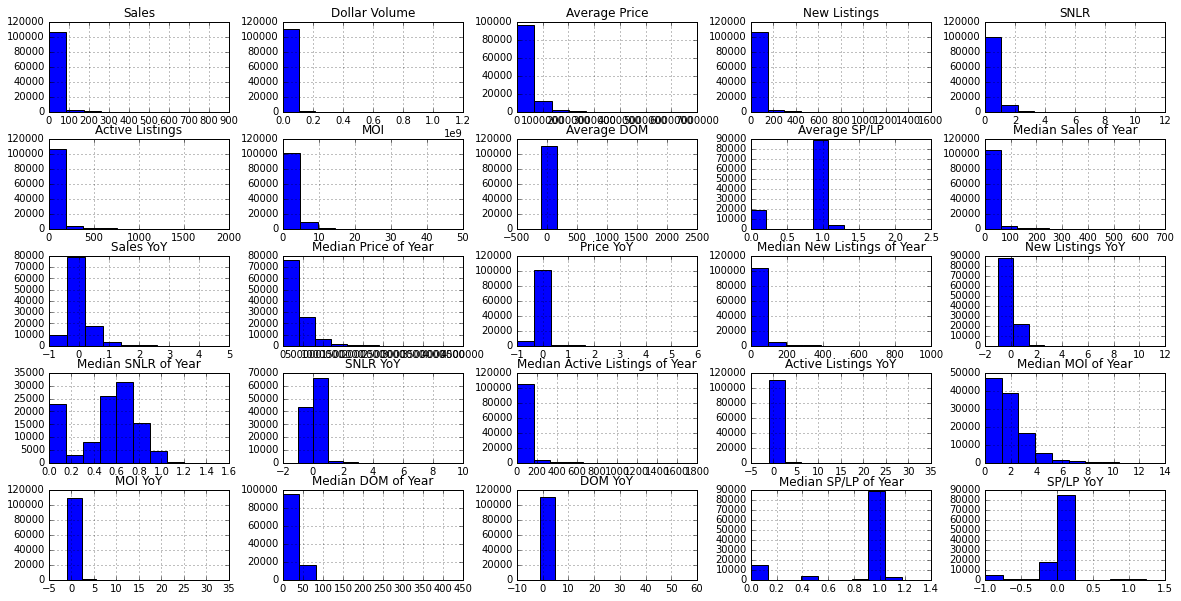

In [28]:
df.select_dtypes(['float','int']).hist(figsize=(20,10));

All of our variables are skewed which implies there are outliers.

However that is mostly because each combination of year/municipality/community/hometype will have a different distribution.

For example, detached homes in Brampton have experienced many more sales than townhomes in Aurora

In [29]:
df[(df['Geography'] == 'Brampton') & (df['HomeType'] == 'Detached')].hist(figsize=(20,10));
#looks much less skewed!

### Sales

#### Which municipalities have the most sales?

Here we look at the sales average for each municipality. The first table from the left shows the historical sales average (1996-2020), the middle looks at the last 5 years and the last one looks at the previous year (2020).

In [30]:
t1 = housing[housing['HomeType'] == 'All values'].groupby('Municipality')[['Sales']].mean().sort_values(by='Sales', ascending=False)
t2 = housing[(housing['HomeType'] == 'All values') & (housing['Year'].isin([2015,2016,2017,2018,2019,2020]))].groupby('Municipality')[['Sales']].mean().sort_values(by='Sales', ascending=False)
t3 = housing[(housing['HomeType'] == 'All values') & (housing['Year'] == 2020)].groupby('Municipality')[['Sales']].mean().sort_values(by='Sales', ascending=False)

t1_styler = t1.style.set_table_attributes("style='display:inline'").set_caption('Historical Sales Average (1996-2020)')
t2_styler = t2.style.set_table_attributes("style='display:inline'").set_caption('Sales Average from \n 2015-2020')
t3_styler = t3.style.set_table_attributes("style='display:inline'").set_caption('Sales Average from 2020')
display_html(t1_styler._repr_html_()+t2_styler._repr_html_()+t3_styler._repr_html_(), raw=True)

Historical Sales Average (1996-2020) Sales Municipality 
 
 Peel 
 498.014301 
 
 
 York 
 131.430876 
 
 
 Durham 
 101.328383 
 
 
 Halton 
 99.969472 
 
 
 Toronto 
 76.434606 
 
 
 Dufferin 
 46.735974 
 
 
 Simcoe 
 32.429703 
 
 Sales Average from 
 2015-2020 Sales Municipality 
 
 Peel 
 545.703704 
 
 
 Halton 
 187.232639 
 
 
 York 
 152.520062 
 
 
 Durham 
 118.309028 
 
 
 Toronto 
 82.381746 
 
 
 Dufferin 
 53.402778 
 
 
 Simcoe 
 47.575000 
 
 Sales Average from 2020 Sales Municipality 
 
 Peel 
 547.777778 
 
 
 Halton 
 205.562500 
 
 
 York 
 153.287037 
 
 
 Durham 
 134.416667 
 
 
 Toronto 
 75.761905 
 
 
 Simcoe 
 59.716667 
 
 
 Dufferin 
 51.750000

We can see that the Halton Region has gained more traction over the years and Peel maintains the highest number of sales. Next we will break this down by community. Communities are the areas within the municipalities.

#### Top 10 Communities ranked by average number of sales for all home types

In [31]:
t1 = housing[housing['HomeType'] == 'All values'].groupby(['Municipality','Geography'])[['Sales']].mean().sort_values(by='Sales', ascending=False)[:10]
t2 = housing[(housing['HomeType'] == 'All values') & (housing['Year'].isin([2015,2016,2017,2018,2019,2020]))].groupby(['Municipality','Geography'])[['Sales']].mean().sort_values(by='Sales', ascending=False)[:10]
t3 = housing[(housing['HomeType'] == 'All values') & (housing['Year'] == 2020)].groupby(['Municipality','Geography'])[['Sales']].mean().sort_values(by='Sales', ascending=False)[:10]

t1_styler = t1.style.set_table_attributes("style='display:inline'").set_caption('Historical Sales Average by Community (1996-2020)')
t2_styler = t2.style.set_table_attributes("style='display:inline'").set_caption('Sales Average by Community from 2015-2020')
t3_styler = t3.style.set_table_attributes("style='display:inline'").set_caption('Sales Average by Community from 2020')
display_html(t1_styler._repr_html_()+t2_styler._repr_html_()+t3_styler._repr_html_(), raw=True)

Historical Sales Average by Community (1996-2020) Sales Municipality Geography 
 
 Peel 
 Mississauga 
 825.603960 
 
 
 Brampton 
 601.580858 
 
 
 York 
 Markham 
 322.079208 
 
 
 Toronto 
 Toronto C01 
 288.468647 
 
 
 York 
 Vaughan 
 270.006601 
 
 
 Richmond Hill 
 238.000000 
 
 
 Durham 
 Oshawa 
 210.933993 
 
 
 Halton 
 Oakville 
 155.801980 
 
 
 Durham 
 Whitby 
 152.089109 
 
 
 Ajax 
 133.603960 
 
 Sales Average by Community from 2015-2020 Sales Municipality Geography 
 
 Peel 
 Mississauga 
 785.930556 
 
 
 Brampton 
 766.097222 
 
 
 Toronto 
 Toronto C01 
 434.125000 
 
 
 York 
 Markham 
 360.944444 
 
 
 Vaughan 
 318.416667 
 
 
 Halton 
 Oakville 
 279.083333 
 
 
 Durham 
 Oshawa 
 259.805556 
 
 
 York 
 Richmond Hill 
 253.902778 
 
 
 Halton 
 Burlington 
 199.611111 
 
 
 Milton 
 187.805556 
 
 Sales Average by Community from 2020 Sales Municipality Geography 
 
 Peel 
 Brampton 
 815.750000 
 
 
 Mississauga 
 722.666667 
 
 
 Toronto 
 Toronto C01 
 360.083333 
 
 
 York 
 Markham 
 330.166667 
 
 
 Vaughan 
 325.916667 
 
 
 Durham 
 Oshawa 
 304.000000 
 
 
 Halton 
 Oakville 
 286.666667 
 
 
 Burlington 
 241.166667 
 
 
 York 
 Richmond Hill 
 237.750000 
 
 
 Halton 
 Milton 
 200.583333

#### What are the average number of sales per home type?

In [32]:
df.groupby(['HomeType'])[['Sales']].mean().sort_values(by='Sales', ascending=False)[:10]

Sales
HomeType                   
Detached          50.259622
Condo Apt         27.451689
Semi-Detached     12.479317
Condo Townhouse    9.923676
Att_Row_Twnhouse   8.272165
Link               4.544288
Det Condo          0.725217
Co-Ownership Apt   0.642983
Co-Op Apt          0.564319

Average number of sales broken down by community & home type:

In [33]:
df.groupby(['Municipality','Geography','HomeType'])[['Sales']].mean().sort_values(by='Sales', ascending=False)[:10]

Sales
Municipality Geography     HomeType                   
Peel         Brampton      Detached         323.907591
             Mississauga   Detached         303.085809
Toronto      Toronto C01   Condo Apt        238.524752
Peel         Mississauga   Condo Apt        204.217822
                           Condo Townhouse  159.108911
York         Markham       Detached         156.042904
             Vaughan       Detached         151.640264
Durham       Oshawa        Detached         141.623762
York         Richmond Hill Detached         135.590759
Peel         Mississauga   Semi-Detached    122.085809

### New Listings

C:\Users\Michael\.conda\envs\mls\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Michael\.conda\envs\mls\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


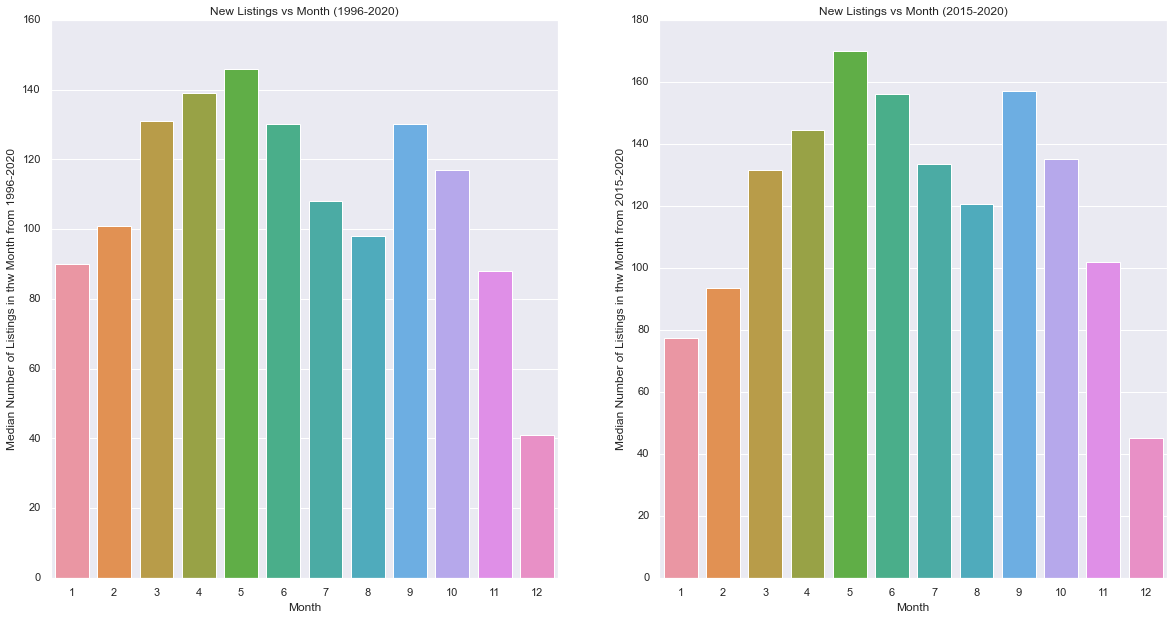

In [35]:
fig, ax = plt.subplots(1,2)
monthly_dom = housing[housing['HomeType'] == 'All values'].groupby(housing[housing['HomeType'] == 'All values']['Date'].dt.month)['New Listings'].median()
sns.barplot(monthly_dom.index, monthly_dom.values, ax=ax[0])
ax[0].set(xlabel='Month', ylabel='Median Number of Listings in thw Month from 1996-2020', title = 'New Listings vs Month (1996-2020)')
monthly_dom = housing[(housing['HomeType'] == 'All values') & (housing['Year'].isin([2015,2016,2017,2018,2019,2020]))].groupby(housing[housing['HomeType'] == 'All values']['Date'].dt.month)['New Listings'].median()
sns.barplot(monthly_dom.index, monthly_dom.values, ax=ax[1])
ax[1].set(xlabel='Month', ylabel='Median Number of Listings in thw Month from 2015-2020', title = 'New Listings vs Month (2015-2020)')
sns.set(rc={'figure.figsize':(20,10)});

### Least Days on the Market
Low average dom but with threshold sales value

In [36]:
df.groupby(['Municipality','Geography','HomeType'])[['Average DOM','Sales']].mean().sort_values(by=['Sales','Average DOM'], ascending=[False,True])[:10]

Average DOM       Sales
Municipality Geography     HomeType                                
Peel         Brampton      Detached           30.533105  323.907591
             Mississauga   Detached           30.318812  303.085809
Toronto      Toronto C01   Condo Apt          35.288293  238.524752
Peel         Mississauga   Condo Apt          36.009427  204.217822
                           Condo Townhouse    31.195307  159.108911
York         Markham       Detached           33.437976  156.042904
             Vaughan       Detached           34.742072  151.640264
Durham       Oshawa        Detached           32.755495  141.623762
York         Richmond Hill Detached           36.254125  135.590759
Peel         Mississauga   Semi-Detached      24.485114  122.085809

C:\Users\Michael\.conda\envs\mls\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Michael\.conda\envs\mls\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Michael\.conda\envs\mls\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

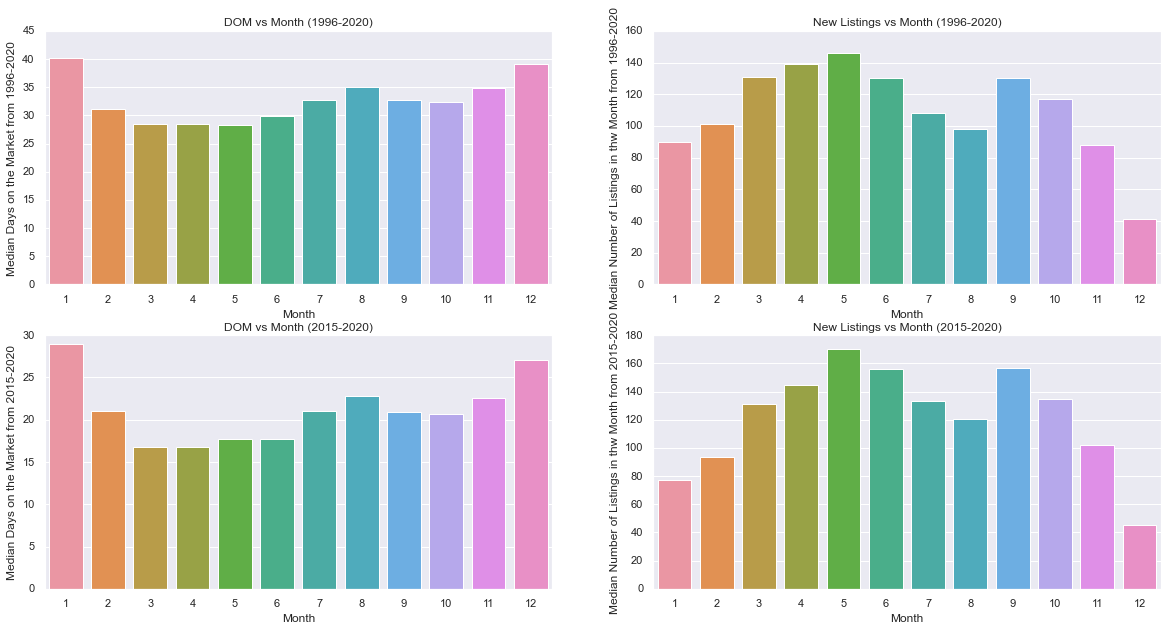

In [37]:
fig, ax =plt.subplots(2,2)
monthly_dom = housing[housing['HomeType'] == 'All values'].groupby(housing[housing['HomeType'] == 'All values']['Date'].dt.month)['Average DOM'].median()
sns.barplot(monthly_dom.index, monthly_dom.values, ax=ax[0][0])
ax[0][0].set(xlabel='Month', ylabel='Median Days on the Market from 1996-2020', title = 'DOM vs Month (1996-2020)')

monthly_dom = housing[housing['HomeType'] == 'All values'].groupby(housing[housing['HomeType'] == 'All values']['Date'].dt.month)['New Listings'].median()
sns.barplot(monthly_dom.index, monthly_dom.values, ax=ax[0][1])
ax[0][1].set(xlabel='Month', ylabel='Median Number of Listings in thw Month from 1996-2020', title = 'New Listings vs Month (1996-2020)')


monthly_dom = housing[(housing['HomeType'] == 'All values') & (housing['Year'].isin([2015,2016,2017,2018,2019,2020]))].groupby(housing[housing['HomeType'] == 'All values']['Date'].dt.month)['Average DOM'].median()
sns.barplot(monthly_dom.index, monthly_dom.values, ax=ax[1][0])
ax[1][0].set(xlabel='Month', ylabel='Median Days on the Market from 2015-2020', title = 'DOM vs Month (2015-2020)')

monthly_dom = housing[(housing['HomeType'] == 'All values') & (housing['Year'].isin([2015,2016,2017,2018,2019,2020]))].groupby(housing[housing['HomeType'] == 'All values']['Date'].dt.month)['New Listings'].median()
sns.barplot(monthly_dom.index, monthly_dom.values, ax=ax[1][1])
ax[1][1].set(xlabel='Month', ylabel='Median Number of Listings in thw Month from 2015-2020', title = 'New Listings vs Month (2015-2020)')

sns.set(rc={'figure.figsize':(20,10)});

We can see that the average days on the market and new listings are almost inversely proportional. You can see that the winter months have the least new listings and also the highest days on the market. Let's take a look at how the indicators of a buyers vs sellers market change over the months.

In [38]:
fig, ax =plt.subplots(2,2)
monthly_moi = housing[housing['HomeType'] == 'All values'].groupby(housing[housing['HomeType'] == 'All values']['Date'].dt.month)['MOI'].median()
sns.barplot(x=monthly_moi.index, y=monthly_moi.values, ax=ax[0][0])
ax[0][0].set(xlabel='Month', ylabel='Median MOI from 1996-2020', title = 'MOI vs Month (1996-2020)')

monthly_splp = housing[housing['HomeType'] == 'All values'].groupby(housing[housing['HomeType'] == 'All values']['Date'].dt.month)['Average SP/LP'].mean()
sns.barplot(x=monthly_splp.index, y=monthly_splp.values, ax=ax[0][1])
ax[0][1].set(xlabel='Month', ylabel='Average SP/LP in the Month from 1996-2020', title = 'Average SP/LP vs Month (1996-2020)')
#annotate axis 
for p in ax[0][1].patches:
             ax[0][1].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
_ = ax[0][1].set_ylim(0,1.5) #To make space for the annotations

monthly_moi = housing[(housing['HomeType'] == 'All values') & (housing['Year'].isin([2015,2016,2017,2018,2019,2020]))].groupby(housing[housing['HomeType'] == 'All values']['Date'].dt.month)['MOI'].median()
sns.barplot(x=monthly_moi.index, y=monthly_moi.values, ax=ax[1][0])
ax[1][0].set(xlabel='Month', ylabel='Median MOI from 2015-2020', title = 'MOI vs Month (2015-2020)')

monthly_splp = housing[(housing['HomeType'] == 'All values') & (housing['Year'].isin([2015,2016,2017,2018,2019,2020]))].groupby(housing[housing['HomeType'] == 'All values']['Date'].dt.month)['Average SP/LP'].mean()
sns.barplot(x=monthly_splp.index, y=monthly_splp.values, ax=ax[1][1])
ax[1][1].set(xlabel='Month', ylabel='Average SP/LP in the Month from 2015-2020', title = 'Average SP/LP vs Month (2015-2020)')
#annotate axis 
for p in ax[1][1].patches:
             ax[1][1].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
_ = ax[1][1].set_ylim(0,1.5) #To make space for the annotations


sns.set(rc={'figure.figsize':(20,10)});

The MOI and Average DOM vs Month are nearly identical. The Average SP/LP tells a different story though. Although properties are taking longer to sell during the winter months, it does not impact the price that much. However, they are very slightly lower than the rest of the months but there are no drastic differences between the months. Perhaps we should break this down by Home Type and or Municipality to see if there are more significant changes.

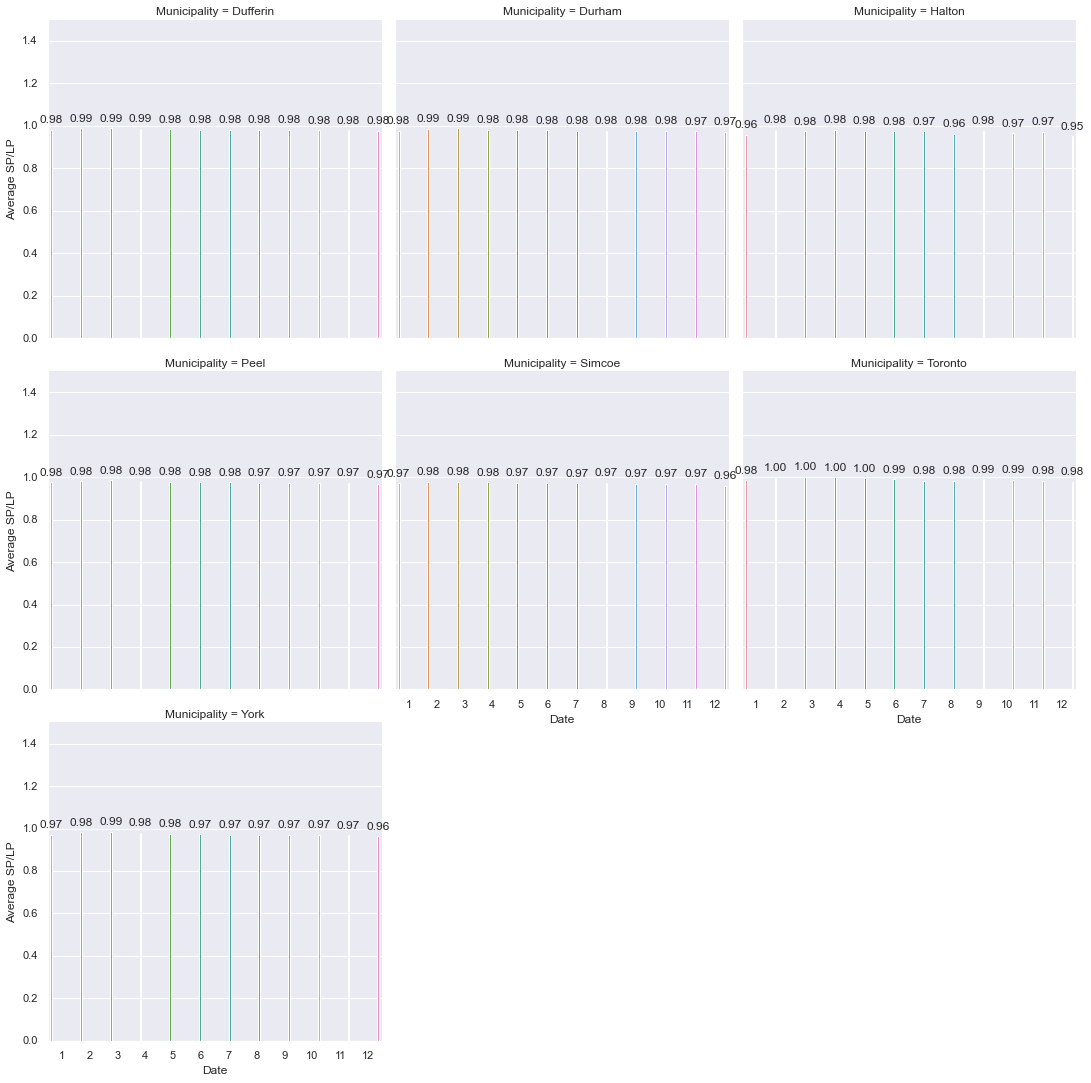

In [39]:
monthly_splp_munic = housing[housing['HomeType'] == 'All values'].groupby([housing[housing['HomeType'] == 'All values']['Date'].dt.month,housing[housing['HomeType'] == 'All values']['Municipality']])['Average SP/LP'].mean().reset_index()
g = sns.catplot(x="Date", y="Average SP/LP",
                hue="Date", col="Municipality",
                data=monthly_splp_munic, kind="bar", col_wrap=3)
for ax in g.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        _ = ax.set_ylim(0,1.5); #To make space for the annotations

In [1]:
# monthly_splp_munic = housing[housing['HomeType'] != 'All values'].groupby([housing[housing['HomeType'] != 'All values']['Date'].dt.month,housing[housing['HomeType'] != 'All values']['Municipality'],housing[housing['HomeType'] != 'All values']['HomeType']])['Average SP/LP'].mean().reset_index()
# monthly_splp_munic
# g = sns.catplot(x="Date", y="Average SP/LP",
#                 hue="Municipality", col="HomeType",
#                 data=monthly_splp_munic, kind="bar", col_wrap=3)
# for ax in g.axes.ravel():
#     for p in ax.patches:
#         ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
#         _ = ax.set_ylim(0,1.5); #To make space for the annotations
# sns.lineplot(x = housing[housing['HomeType'] != 'All values']['Date'], y = housing[housing['HomeType'] != 'All values']['Average SP/LP'], hue =  housing[housing['HomeType'] != 'All values']['HomeType'])

In [2]:
# housing[housing['HomeType'] != 'All values'].sort_values(by=['Average SP/LP'],ascending=False)

In [40]:
monthly_dom_munic = housing[housing['HomeType'] == 'All values'].groupby([housing[housing['HomeType'] == 'All values']['Date'].dt.month,housing[housing['HomeType'] == 'All values']['Municipality']])['Average DOM'].median().reset_index()
g = sns.catplot(x="Date", y="Average DOM",
                hue="Date", col="Municipality",
                data=monthly_dom_munic, kind="bar", col_wrap=3);

In [41]:
monthly_dom_munic_hometype = housing_without_allvals.groupby([housing_without_allvals['Date'].dt.month,housing_without_allvals['Municipality'], housing_without_allvals['HomeType']])['Average DOM'].median().reset_index()
g = sns.catplot(x="Date", y="Average DOM",
                hue="HomeType", col="Municipality",
                data=monthly_dom_munic_hometype, kind="bar", col_wrap=2, aspect=2);

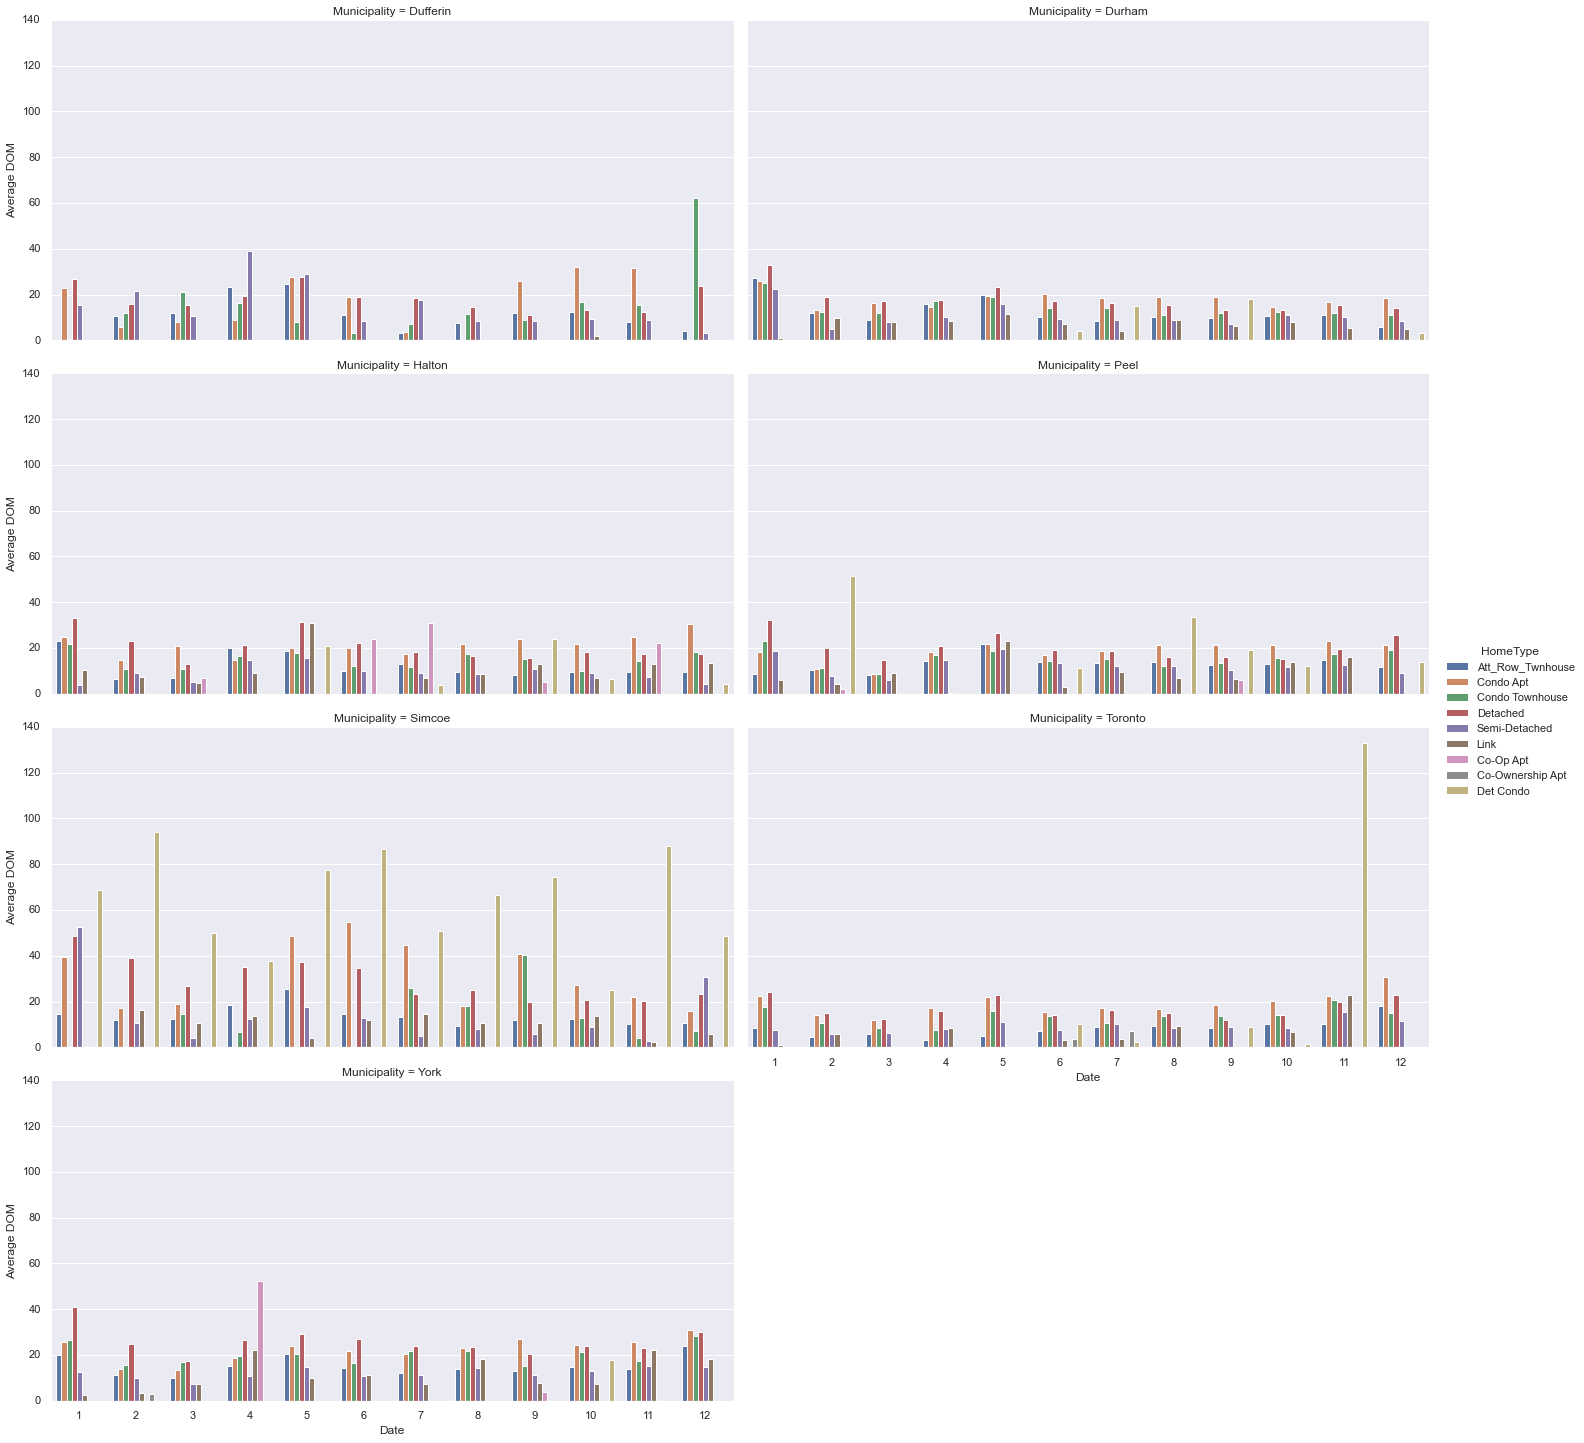

In [42]:
monthly_dom_munic_hometype = housing_without_allvals[housing_without_allvals['Date'].dt.year == 2020].groupby([housing_without_allvals[housing_without_allvals['Date'].dt.year == 2020]['Date'].dt.month,housing_without_allvals[housing_without_allvals['Date'].dt.year == 2020]['Municipality'], housing_without_allvals[housing_without_allvals['Date'].dt.year == 2020]['HomeType']])['Average DOM'].median().reset_index()
g = sns.catplot(x="Date", y="Average DOM",
                hue="HomeType", col="Municipality",
                data=monthly_dom_munic_hometype, kind="bar", col_wrap=2, aspect=2);

## Broken down by home types
### Detached

In [43]:
housing[(housing['HomeType'] == 'Detached')]['Geography'].value_counts()
# check to see if there is an uneven distibution

Toronto E11               303
King                      303
Pickering                 303
Toronto E06               303
Toronto C09               303
                         ... 
Adjala-Tosorontio         303
Whitchurch-Stouffville    303
Toronto C15               303
Toronto C12               303
Toronto C08               302
Name: Geography, Length: 65, dtype: int64

In [50]:
# without Number of Sales threshold

# top 10 sales and average prices of detached homes
t1 = housing[(housing['HomeType'] == 'Detached')].groupby(['Municipality','Geography'])[['Sales']].mean().sort_values(by='Sales', ascending=False)[:10]

t2 = housing[(housing['HomeType'] == 'Detached')].groupby(['Municipality','Geography'])[['Average Price']].median().sort_values(by='Average Price', ascending=False)[:10]

t3 = housing[(housing['HomeType'] == 'Detached')].groupby(['Municipality','Geography'])[['MOI']].mean().sort_values(by='MOI', ascending=True)[:10]

t4 = housing[(housing['HomeType'] == 'Detached')].groupby(['Municipality','Geography'])[['Average DOM']].mean().sort_values(by='Average DOM', ascending=True)[:10]

t5 = housing[(housing['HomeType'] == 'Detached')].groupby(['Municipality','Geography'])[['SNLR']].mean().sort_values(by='SNLR', ascending=False)[:10]

t6 = housing[(housing['HomeType'] == 'Detached')].groupby(['Municipality','Geography'])[['Average SP/LP']].mean().sort_values(by='Average SP/LP', ascending=False)[:10]

t1_styler = t1.style.set_table_attributes("style='display:inline'").set_caption('Sales Average of Detached (1996-2020)')
t2_styler = t2.style.set_table_attributes("style='display:inline'").set_caption('Average Price of Detached (1996-2020)')
t3_styler = t3.style.set_table_attributes("style='display:inline'").set_caption('Average MOI of Detached (1996-2020)')
t4_styler = t4.style.set_table_attributes("style='display:inline'").set_caption('Average DOM of Detached (1996-2020)')
t5_styler = t5.style.set_table_attributes("style='display:inline'").set_caption('Average SNLR of Detached (1996-2020)')
t6_styler = t6.style.set_table_attributes("style='display:inline'").set_caption('Average SP/LP of Detached (1996-2020)')
display_html(t1_styler._repr_html_()+t2_styler._repr_html_()+t3_styler._repr_html_()+t4_styler._repr_html_()+t5_styler._repr_html_()+t6_styler._repr_html_(), raw=True)

Sales Average of Detached (1996-2020) Sales Municipality Geography 
 
 Peel 
 Brampton 
 323.907591 
 
 
 Mississauga 
 303.085809 
 
 
 York 
 Markham 
 156.042904 
 
 
 Vaughan 
 151.640264 
 
 
 Durham 
 Oshawa 
 141.623762 
 
 
 York 
 Richmond Hill 
 135.590759 
 
 
 Durham 
 Whitby 
 100.726073 
 
 
 Halton 
 Oakville 
 95.557756 
 
 
 Durham 
 Ajax 
 89.089109 
 
 
 Clarington 
 82.706271 
 
 Average Price of Detached (1996-2020) Average Price Municipality Geography 
 
 Toronto 
 Toronto C12 
 1745195.750000 
 
 
 Toronto C09 
 1679400.000000 
 
 
 Toronto C02 
 1197185.750000 
 
 
 Toronto C04 
 1004449.875000 
 
 
 Toronto C11 
 973333.312500 
 
 
 Toronto C03 
 858337.187500 
 
 
 Toronto C10 
 823000.000000 
 
 
 Toronto C13 
 790500.000000 
 
 
 Toronto C14 
 773153.125000 
 
 
 Toronto W08 
 734712.000000 
 
 Average MOI of Detached (1996-2020) MOI Municipality Geography 
 
 Toronto 
 Toronto W07 
 1.745502 
 
 
 Toronto E03 
 1.761503 
 
 
 Toronto E02 
 1.780724 
 
 
 Toronto W02 
 1.785665 
 
 
 Toronto C11 
 1.858009 
 
 
 Toronto C10 
 1.867450 
 
 
 Toronto E04 
 1.887622 
 
 
 Toronto E01 
 1.942093 
 
 
 Toronto E09 
 1.975511 
 
 
 Toronto W01 
 2.045862 
 
 Average DOM of Detached (1996-2020) Average DOM Municipality Geography 
 
 Toronto 
 Toronto C11 
 20.086632 
 
 
 Toronto E02 
 20.835477 
 
 
 Toronto C10 
 21.510440 
 
 
 Toronto E01 
 21.539538 
 
 
 Toronto E03 
 22.042933 
 
 
 Toronto W02 
 23.137173 
 
 
 Toronto W07 
 23.429665 
 
 
 Toronto E04 
 23.841907 
 
 
 Toronto W01 
 24.391878 
 
 
 Toronto E06 
 24.601021 
 
 Average SNLR of Detached (1996-2020) SNLR Municipality Geography 
 
 Toronto 
 Toronto C11 
 0.792175 
 
 
 Toronto C10 
 0.774381 
 
 
 Toronto W01 
 0.772501 
 
 
 Toronto W07 
 0.766616 
 
 
 Toronto C09 
 0.756805 
 
 
 Dufferin 
 Orangeville 
 0.729630 
 
 
 York 
 Newmarket 
 0.711064 
 
 
 Toronto 
 Toronto W02 
 0.708396 
 
 
 Toronto W06 
 0.706744 
 
 
 Halton 
 Halton Hills 
 0.695551 
 
 Average SP/LP of Detached (1996-2020) Average SP/LP Municipality Geography 
 
 Toronto 
 Toronto E01 
 1.023330 
 
 
 Toronto W02 
 1.012131 
 
 
 Toronto E03 
 1.010376 
 
 
 Toronto C10 
 1.009140 
 
 
 Toronto C11 
 1.008954 
 
 
 Toronto W01 
 1.003456 
 
 
 Toronto W07 
 1.002701 
 
 
 Toronto E02 
 0.999087 
 
 
 Toronto E04 
 0.995109 
 
 
 Toronto E05 
 0.994206

It's fascinating that Toronto has so much demand for detached homes but it seems that there is a supply issue since it no communities of Toronto are even in the top 10 of average number of sales. This could mean there is a skew and we can reduce that by creating a threshold for the number of sales or listings.
Let's see how the results will change by reducing the skew and let's also look at a plot of Toronto's Detached Stats

In [45]:

fig = px.line(housing_without_allvals[(housing_without_allvals['Municipality'] == 'Toronto') & (housing_without_allvals['HomeType'] == 'Detached')], x='Date', y='Sales', title='Time Series with Range Slider and Selectors', color='Geography')
fig = go.Figure()
# Add traces
fig.add_trace(
    go.Scatter(x=housing_without_allvals[(housing_without_allvals['Geography'] == 'Toronto C12') & (housing_without_allvals['HomeType'] == 'Detached')]['Date'], 
                         y=housing_without_allvals[(housing_without_allvals['Geography'] == 'Toronto C12') & (housing_without_allvals['HomeType'] == 'Detached')]['Average Price'],
                    mode='lines',
                    name='Average Price')
)

fig.add_trace(
    go.Scatter(x=housing_without_allvals[(housing_without_allvals['Geography'] == 'Toronto C12') & (housing_without_allvals['HomeType'] == 'Detached')]['Date'], 
                         y=housing_without_allvals[(housing_without_allvals['Geography'] == 'Toronto C12') & (housing_without_allvals['HomeType'] == 'Detached')]['Sales'],
                    mode='lines',
                    name='Sales', yaxis='y2'),
)

fig.add_trace(
    go.Scatter(x=housing_without_allvals[(housing_without_allvals['Geography'] == 'Toronto C12') & (housing_without_allvals['HomeType'] == 'Detached')]['Date'], 
                         y=housing_without_allvals[(housing_without_allvals['Geography'] == 'Toronto C12') & (housing_without_allvals['HomeType'] == 'Detached')]['SNLR'],
                    mode='lines',name='SNLR', yaxis='y3'), 
)

# Add figure title
fig.update_layout(
    title_text="Toronto C12 Detached Homes"
)

# Set x-axis title
fig.update_xaxes(title_text="Date")
# Create axis objects
fig.update_layout(
    xaxis=dict(
        domain=[0.1, 1]
    ),
    yaxis=dict(
        title="Average Sales",
        titlefont=dict(
            color="#1f77b4"
        ),
        tickfont=dict(
            color="#1f77b4"
        )
    ),
    yaxis2=dict(
        title="Sales",
        titlefont=dict(
            color="red"
        ),
        tickfont=dict(
            color="red"
        ),
        anchor="free",
        overlaying="y",
        side="left",
        position=0
    ),
    yaxis3=dict(
        title="SNLR",
        titlefont=dict(
            color="green"
        ),
        tickfont=dict(
            color="green"
        ),
        anchor="x",
        overlaying="y",
        side="right"
    ),

)


fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [46]:
# top 10 sales and average prices of detached homes

# create a threshold of number of sales to reduce skew
t = housing[(housing['HomeType'] == 'Detached')].groupby(['Municipality','Geography']).mean().reset_index()
t1 = t.loc[t['Sales'] > 50][['Geography','Sales']].sort_values(by='Sales', ascending=False)[:10].reset_index(drop=True)

t2 = t.loc[t['Sales'] > 50][['Geography','Average Price']].sort_values(by='Average Price', ascending=False)[:10].reset_index(drop=True)

t3 = t.loc[t['Sales'] > 50][['Geography','MOI']].sort_values(by='MOI', ascending=True)[:10].reset_index(drop=True)

t4 = t.loc[t['Sales'] > 50][['Geography','Average DOM']].sort_values(by='Average DOM', ascending=True)[:10].reset_index(drop=True)

t5 = t.loc[t['Sales'] > 50][['Geography','SNLR']].sort_values(by='SNLR', ascending=False)[:10].reset_index(drop=True)

t6 = t.loc[t['Sales'] > 50][['Geography','Average SP/LP']].sort_values(by='Average SP/LP', ascending=False)[:10].reset_index(drop=True)

t1_styler = t1.style.set_table_attributes("style='display:inline'").set_caption('Historical Sales Average of Detached (1996-2020)')
t2_styler = t2.style.set_table_attributes("style='display:inline'").set_caption('Historical Average Price of Detached (1996-2020)')
t3_styler = t3.style.set_table_attributes("style='display:inline'").set_caption('Historical Average MOI of Detached (1996-2020)')
t4_styler = t4.style.set_table_attributes("style='display:inline'").set_caption('Historical Average DOM of Detached (1996-2020)')
t5_styler = t5.style.set_table_attributes("style='display:inline'").set_caption('Historical Average SNLR of Detached (1996-2020)')
t6_styler = t6.style.set_table_attributes("style='display:inline'").set_caption('Historical Average SP/LP of Detached (1996-2020)')
display_html(t1_styler._repr_html_()+t2_styler._repr_html_()+t3_styler._repr_html_(), raw=True)
display_html(t4_styler._repr_html_()+t5_styler._repr_html_()+t6_styler._repr_html_(), raw=True)

Historical Sales Average of Detached (1996-2020) Geography Sales 
 
 0 
 Brampton 
 323.907591 
 
 
 1 
 Mississauga 
 303.085809 
 
 
 2 
 Markham 
 156.042904 
 
 
 3 
 Vaughan 
 151.640264 
 
 
 4 
 Oshawa 
 141.623762 
 
 
 5 
 Richmond Hill 
 135.590759 
 
 
 6 
 Whitby 
 100.726073 
 
 
 7 
 Oakville 
 95.557756 
 
 
 8 
 Ajax 
 89.089109 
 
 
 9 
 Clarington 
 82.706271 
 
 Historical Average Price of Detached (1996-2020) Geography Average Price 
 
 0 
 Toronto C04 
 1174101.191832 
 
 
 1 
 Toronto W08 
 821872.695441 
 
 
 2 
 Richmond Hill 
 757836.195648 
 
 
 3 
 Oakville 
 747291.651196 
 
 
 4 
 Markham 
 714478.920173 
 
 
 5 
 Vaughan 
 699029.045173 
 
 
 6 
 Mississauga 
 606116.214986 
 
 
 7 
 Caledon 
 575970.638614 
 
 
 8 
 Toronto E03 
 535975.247576 
 
 
 9 
 Newmarket 
 494403.490357 
 
 Historical Average MOI of Detached (1996-2020) Geography MOI 
 
 0 
 Toronto E03 
 1.761503 
 
 
 1 
 Ajax 
 2.118520 
 
 
 2 
 Whitby 
 2.277580 
 
 
 3 
 Toronto W08 
 2.307573 
 
 
 4 
 Newmarket 
 2.355146 
 
 
 5 
 Toronto C04 
 2.393329 
 
 
 6 
 Oshawa 
 2.427170 
 
 
 7 
 Brampton 
 2.587082 
 
 
 8 
 Mississauga 
 2.617398 
 
 
 9 
 Pickering 
 2.661967

Historical Average DOM of Detached (1996-2020) Geography Average DOM 
 
 0 
 Toronto E03 
 22.042933 
 
 
 1 
 Toronto C04 
 24.836261 
 
 
 2 
 Ajax 
 27.727289 
 
 
 3 
 Toronto W08 
 28.434510 
 
 
 4 
 Whitby 
 30.175487 
 
 
 5 
 Mississauga 
 30.318812 
 
 
 6 
 Pickering 
 30.446165 
 
 
 7 
 Brampton 
 30.533105 
 
 
 8 
 Newmarket 
 32.283160 
 
 
 9 
 Oshawa 
 32.755495 
 
 Historical Average SNLR of Detached (1996-2020) Geography SNLR 
 
 0 
 Newmarket 
 0.711064 
 
 
 1 
 Halton Hills 
 0.695551 
 
 
 2 
 Toronto W08 
 0.694265 
 
 
 3 
 Ajax 
 0.671986 
 
 
 4 
 Toronto E03 
 0.658545 
 
 
 5 
 Whitby 
 0.657189 
 
 
 6 
 Oshawa 
 0.653990 
 
 
 7 
 Toronto C04 
 0.639346 
 
 
 8 
 Clarington 
 0.626408 
 
 
 9 
 Oakville 
 0.621743 
 
 Historical Average SP/LP of Detached (1996-2020) Geography Average SP/LP 
 
 0 
 Toronto E03 
 1.010376 
 
 
 1 
 Toronto C04 
 0.993448 
 
 
 2 
 Ajax 
 0.988278 
 
 
 3 
 Whitby 
 0.986752 
 
 
 4 
 Oshawa 
 0.985768 
 
 
 5 
 Toronto W08 
 0.984125 
 
 
 6 
 Newmarket 
 0.983246 
 
 
 7 
 Pickering 
 0.982311 
 
 
 8 
 Clarington 
 0.981564 
 
 
 9 
 Markham 
 0.980605

Some Toronto areas still have a high demand for detached homes and limited supply (listings) 

#### Now the top 10 of the past 5 years:

In [47]:
# top 10 sales and average prices of detached homes
# without threshold

t1 = housing[(housing['HomeType'] == 'Detached') & (housing['Year'].isin([2015,2016,2017,2018,2019,2020]))].groupby(['Municipality','Geography'])[['Sales']].mean().sort_values(by='Sales', ascending=False)[:10]

t2 = housing[(housing['HomeType'] == 'Detached') & (housing['Year'].isin([2015,2016,2017,2018,2019,2020]))].groupby(['Municipality','Geography'])[['Average Price']].mean().sort_values(by='Average Price', ascending=False)[:10]

t3 = housing[(housing['HomeType'] == 'Detached') & (housing['Year'].isin([2015,2016,2017,2018,2019,2020]))].groupby(['Municipality','Geography'])[['MOI']].mean().sort_values(by='MOI', ascending=True)[:10]

t4 = housing[(housing['HomeType'] == 'Detached') & (housing['Year'].isin([2015,2016,2017,2018,2019,2020]))].groupby(['Municipality','Geography'])[['Average DOM']].mean().sort_values(by='Average DOM', ascending=True)[:10]

t5 = housing[(housing['HomeType'] == 'Detached') & (housing['Year'].isin([2015,2016,2017,2018,2019,2020]))].groupby(['Municipality','Geography'])[['SNLR']].mean().sort_values(by='SNLR', ascending=False)[:10]

t6 = housing[(housing['HomeType'] == 'Detached') & (housing['Year'].isin([2015,2016,2017,2018,2019,2020]))].groupby(['Municipality','Geography'])[['Average SP/LP']].mean().sort_values(by='Average SP/LP', ascending=False)[:10]

t1_styler = t1.style.set_table_attributes("style='display:inline'").set_caption('Sales Average of Detached (2015-2020)')
t2_styler = t2.style.set_table_attributes("style='display:inline'").set_caption('Average Price of Detached (2015-2020)')
t3_styler = t3.style.set_table_attributes("style='display:inline'").set_caption('Average MOI of Detached (2015-2020)')
t4_styler = t4.style.set_table_attributes("style='display:inline'").set_caption('Average DOM of Detached (2015-2020)')
t5_styler = t5.style.set_table_attributes("style='display:inline'").set_caption('Average SNLR of Detached (2015-2020)')
t6_styler = t6.style.set_table_attributes("style='display:inline'").set_caption('Average SP/LP of Detached (2015-2020)')
display_html(t1_styler._repr_html_()+t2_styler._repr_html_()+t3_styler._repr_html_()+t4_styler._repr_html_()+t5_styler._repr_html_()+t6_styler._repr_html_(), raw=True)

Sales Average of Detached (2015-2020) Sales Municipality Geography 
 
 Peel 
 Brampton 
 407.888889 
 
 
 Mississauga 
 267.972222 
 
 
 Durham 
 Oshawa 
 183.763889 
 
 
 York 
 Vaughan 
 170.069444 
 
 
 Markham 
 164.013889 
 
 
 Halton 
 Oakville 
 163.208333 
 
 
 York 
 Richmond Hill 
 135.972222 
 
 
 Durham 
 Whitby 
 118.041667 
 
 
 Clarington 
 114.486111 
 
 
 Halton 
 Burlington 
 107.263889 
 
 Average Price of Detached (2015-2020) Average Price Municipality Geography 
 
 Toronto 
 Toronto C12 
 3686618.032986 
 
 
 Toronto C09 
 3238410.149306 
 
 
 Toronto C02 
 2256155.763889 
 
 
 Toronto C04 
 2124447.282986 
 
 
 Toronto C14 
 2058286.298611 
 
 
 Toronto C11 
 1940493.449653 
 
 
 Toronto C03 
 1926783.241319 
 
 
 Toronto C10 
 1788300.718750 
 
 
 Toronto C13 
 1725463.682292 
 
 
 Toronto C07 
 1654801.182292 
 
 Average MOI of Detached (2015-2020) MOI Municipality Geography 
 
 Toronto 
 Toronto C08 
 1.248148 
 
 
 Toronto E09 
 1.255350 
 
 
 Toronto W02 
 1.270235 
 
 
 Durham 
 Ajax 
 1.298056 
 
 
 Toronto 
 Toronto E03 
 1.301714 
 
 
 Toronto E01 
 1.304900 
 
 
 Toronto E02 
 1.368562 
 
 
 Toronto E04 
 1.374031 
 
 
 Durham 
 Oshawa 
 1.519492 
 
 
 Dufferin 
 Orangeville 
 1.528958 
 
 Average DOM of Detached (2015-2020) Average DOM Municipality Geography 
 
 Toronto 
 Toronto E01 
 12.109626 
 
 
 Toronto E03 
 13.802672 
 
 
 Toronto W02 
 14.203055 
 
 
 Toronto E02 
 14.727505 
 
 
 Toronto C10 
 14.978464 
 
 
 Toronto E04 
 15.468355 
 
 
 Toronto E09 
 15.835939 
 
 
 Toronto C08 
 15.850000 
 
 
 Toronto E06 
 16.018281 
 
 
 Durham 
 Ajax 
 16.019164 
 
 Average SNLR of Detached (2015-2020) SNLR Municipality Geography 
 
 Dufferin 
 Orangeville 
 0.791334 
 
 
 Toronto 
 Toronto E01 
 0.762875 
 
 
 Toronto C11 
 0.737567 
 
 
 Toronto E02 
 0.708637 
 
 
 Simcoe 
 New Tecumseth 
 0.707673 
 
 
 Toronto 
 Toronto W09 
 0.706478 
 
 
 Toronto W02 
 0.704679 
 
 
 Toronto W01 
 0.702420 
 
 
 Toronto E09 
 0.701866 
 
 
 Halton 
 Halton Hills 
 0.698736 
 
 Average SP/LP of Detached (2015-2020) Average SP/LP Municipality Geography 
 
 Toronto 
 Toronto E01 
 1.091599 
 
 
 Toronto E03 
 1.057612 
 
 
 Toronto W02 
 1.051292 
 
 
 Toronto C01 
 1.038793 
 
 
 Toronto E04 
 1.035599 
 
 
 Toronto E05 
 1.035136 
 
 
 Toronto C10 
 1.034775 
 
 
 Toronto E07 
 1.033237 
 
 
 Toronto W03 
 1.032148 
 
 
 Toronto E02 
 1.032090

Wow, the average price of detached homes in Toronto C12 is insane (this is mostly due to a small number of homes being sold)!

In [51]:
# top 10 sales and average prices of detached homes

# create a threshold of number of sales to reduce skew
t = housing[(housing['HomeType'] == 'Detached') & (housing['Year'].isin([2015,2016,2017,2018,2019,2020]))].groupby(['Municipality','Geography']).mean().reset_index()
t1 = t.loc[t['Sales'] > 50][['Geography','Sales']].sort_values(by='Sales', ascending=False)[:10].reset_index(drop=True)

t2 = t.loc[t['Sales'] > 50][['Geography','Average Price']].sort_values(by='Average Price', ascending=False)[:10].reset_index(drop=True)

t3 = t.loc[t['Sales'] > 50][['Geography','MOI']].sort_values(by='MOI', ascending=True)[:10].reset_index(drop=True)

t4 = t.loc[t['Sales'] > 50][['Geography','Average DOM']].sort_values(by='Average DOM', ascending=True)[:10].reset_index(drop=True)

t5 = t.loc[t['Sales'] > 50][['Geography','SNLR']].sort_values(by='SNLR', ascending=False)[:10].reset_index(drop=True)

t6 = t.loc[t['Sales'] > 50][['Geography','Average SP/LP']].sort_values(by='Average SP/LP', ascending=False)[:10].reset_index(drop=True)

t1_styler = t1.style.set_table_attributes("style='display:inline'").set_caption('Sales Average of Detached (2015-2020)')
t2_styler = t2.style.set_table_attributes("style='display:inline'").set_caption('Average Price of Detached (2015-2020)')
t3_styler = t3.style.set_table_attributes("style='display:inline'").set_caption('Average MOI of Detached (2015-2020)')
t4_styler = t4.style.set_table_attributes("style='display:inline'").set_caption('Average DOM of Detached (2015-2020)')
t5_styler = t5.style.set_table_attributes("style='display:inline'").set_caption('Average SNLR of Detached (2015-2020)')
t6_styler = t6.style.set_table_attributes("style='display:inline'").set_caption('Average SP/LP of Detached (2015-2020)')
display_html(t1_styler._repr_html_()+t2_styler._repr_html_()+t3_styler._repr_html_()+t4_styler._repr_html_()+t5_styler._repr_html_()+t6_styler._repr_html_(), raw=True)

Sales Average of Detached (2015-2020) Geography Sales 
 
 0 
 Brampton 
 407.888889 
 
 
 1 
 Mississauga 
 267.972222 
 
 
 2 
 Oshawa 
 183.763889 
 
 
 3 
 Vaughan 
 170.069444 
 
 
 4 
 Markham 
 164.013889 
 
 
 5 
 Oakville 
 163.208333 
 
 
 6 
 Richmond Hill 
 135.972222 
 
 
 7 
 Whitby 
 118.041667 
 
 
 8 
 Clarington 
 114.486111 
 
 
 9 
 Burlington 
 107.263889 
 
 Average Price of Detached (2015-2020) Geography Average Price 
 
 0 
 Richmond Hill 
 1410989.340278 
 
 
 1 
 Toronto W08 
 1384203.890625 
 
 
 2 
 Oakville 
 1329424.539062 
 
 
 3 
 Markham 
 1308026.990451 
 
 
 4 
 Vaughan 
 1255814.842882 
 
 
 5 
 Aurora 
 1129769.413194 
 
 
 6 
 Mississauga 
 1060925.230903 
 
 
 7 
 Caledon 
 989037.013889 
 
 
 8 
 Burlington 
 950975.925347 
 
 
 9 
 Newmarket 
 883830.227431 
 
 Average MOI of Detached (2015-2020) Geography MOI 
 
 0 
 Ajax 
 1.298056 
 
 
 1 
 Oshawa 
 1.519492 
 
 
 2 
 Whitby 
 1.541221 
 
 
 3 
 Brampton 
 1.715566 
 
 
 4 
 Clarington 
 1.752726 
 
 
 5 
 Milton 
 1.926271 
 
 
 6 
 Halton Hills 
 2.038753 
 
 
 7 
 Pickering 
 2.070997 
 
 
 8 
 Toronto W08 
 2.118393 
 
 
 9 
 Burlington 
 2.180496 
 
 Average DOM of Detached (2015-2020) Geography Average DOM 
 
 0 
 Ajax 
 16.019164 
 
 
 1 
 Oshawa 
 16.986972 
 
 
 2 
 Whitby 
 17.658736 
 
 
 3 
 Brampton 
 18.394541 
 
 
 4 
 Pickering 
 19.180834 
 
 
 5 
 Clarington 
 20.536816 
 
 
 6 
 Toronto W08 
 20.556694 
 
 
 7 
 Mississauga 
 20.730100 
 
 
 8 
 Milton 
 21.237877 
 
 
 9 
 Markham 
 21.610420 
 
 Average SNLR of Detached (2015-2020) Geography SNLR 
 
 0 
 Halton Hills 
 0.698736 
 
 
 1 
 Ajax 
 0.695779 
 
 
 2 
 Burlington 
 0.685395 
 
 
 3 
 Clarington 
 0.665520 
 
 
 4 
 Oshawa 
 0.665136 
 
 
 5 
 Whitby 
 0.663372 
 
 
 6 
 Milton 
 0.655968 
 
 
 7 
 Toronto W08 
 0.643263 
 
 
 8 
 Newmarket 
 0.623403 
 
 
 9 
 Pickering 
 0.611669 
 
 Average SP/LP of Detached (2015-2020) Geography Average SP/LP 
 
 0 
 Ajax 
 1.014999 
 
 
 1 
 Oshawa 
 1.013340 
 
 
 2 
 Whitby 
 1.008056 
 
 
 3 
 Markham 
 1.006565 
 
 
 4 
 Clarington 
 1.001976 
 
 
 5 
 Toronto W08 
 1.001703 
 
 
 6 
 Pickering 
 1.000782 
 
 
 7 
 Newmarket 
 0.999015 
 
 
 8 
 Richmond Hill 
 0.995349 
 
 
 9 
 Brampton 
 0.993812

The Durham area seems to have a high demand for detached homes and they're also the cheapest seeing that they aren't even in the top 10 of average prices.

#### Top 10 of Previous Year:

In [52]:
# top 10 sales and average prices of detached homes
# without threshold
t1 = housing[(housing['HomeType'] == 'Detached') & (housing['Year'].isin([2020]))].groupby(['Municipality','Geography'])[['Sales']].mean().sort_values(by='Sales', ascending=False)[:10]

t2 = housing[(housing['HomeType'] == 'Detached') & (housing['Year'].isin([2020]))].groupby(['Municipality','Geography'])[['Average Price']].mean().sort_values(by='Average Price', ascending=False)[:10]

t3 = housing[(housing['HomeType'] == 'Detached') & (housing['Year'].isin([2020]))].groupby(['Municipality','Geography'])[['MOI']].mean().sort_values(by='MOI', ascending=True)[:10]

t4 = housing[(housing['HomeType'] == 'Detached') & (housing['Year'].isin([2020]))].groupby(['Municipality','Geography'])[['Average DOM']].mean().sort_values(by='Average DOM', ascending=True)[:10]

t5 = housing[(housing['HomeType'] == 'Detached') & (housing['Year'].isin([2020]))].groupby(['Municipality','Geography'])[['SNLR']].mean().sort_values(by='SNLR', ascending=False)[:10]

t6 = housing[(housing['HomeType'] == 'Detached') & (housing['Year'].isin([2020]))].groupby(['Municipality','Geography'])[['Average SP/LP']].mean().sort_values(by='Average SP/LP', ascending=False)[:10]

t1_styler = t1.style.set_table_attributes("style='display:inline'").set_caption('Sales Average of Detached (2020)')
t2_styler = t2.style.set_table_attributes("style='display:inline'").set_caption('Average Price of Detached (2020)')
t3_styler = t3.style.set_table_attributes("style='display:inline'").set_caption('Average MOI of Detached (2020)')
t4_styler = t4.style.set_table_attributes("style='display:inline'").set_caption('Average DOM of Detached (2020)')
t5_styler = t5.style.set_table_attributes("style='display:inline'").set_caption('Average SNLR of Detached (2020)')
t6_styler = t6.style.set_table_attributes("style='display:inline'").set_caption('Average SP/LP of Detached (2020)')
display_html(t1_styler._repr_html_()+t2_styler._repr_html_()+t3_styler._repr_html_()+t4_styler._repr_html_()+t5_styler._repr_html_()+t6_styler._repr_html_(), raw=True)

Sales Average of Detached (2020) Sales Municipality Geography 
 
 Peel 
 Brampton 
 439.833333 
 
 
 Mississauga 
 264.666667 
 
 
 Durham 
 Oshawa 
 208.916667 
 
 
 York 
 Vaughan 
 174.750000 
 
 
 Halton 
 Oakville 
 166.333333 
 
 
 York 
 Markham 
 157.083333 
 
 
 Durham 
 Clarington 
 137.083333 
 
 
 Whitby 
 134.333333 
 
 
 Halton 
 Burlington 
 124.750000 
 
 
 York 
 Richmond Hill 
 124.416667 
 
 Average Price of Detached (2020) Average Price Municipality Geography 
 
 Toronto 
 Toronto C12 
 3731546.229167 
 
 
 Toronto C09 
 3594161.687500 
 
 
 Toronto C02 
 2748034.145833 
 
 
 Toronto C11 
 2366418.656250 
 
 
 Toronto C04 
 2344279.906250 
 
 
 Toronto C03 
 2222554.114583 
 
 
 Toronto C14 
 2097533.510417 
 
 
 Toronto W01 
 2083086.354167 
 
 
 Toronto C10 
 2078837.020833 
 
 
 Toronto C01 
 1942924.156250 
 
 Average MOI of Detached (2020) MOI Municipality Geography 
 
 Toronto 
 Toronto E09 
 0.727355 
 
 
 Durham 
 Ajax 
 0.765050 
 
 
 Oshawa 
 0.830167 
 
 
 Toronto 
 Toronto E04 
 0.860635 
 
 
 Toronto W10 
 0.904874 
 
 
 Durham 
 Whitby 
 0.979762 
 
 
 Toronto 
 Toronto W02 
 1.030025 
 
 
 Toronto E03 
 1.146823 
 
 
 Toronto E02 
 1.158885 
 
 
 Durham 
 Clarington 
 1.197665 
 
 Average DOM of Detached (2020) Average DOM Municipality Geography 
 
 Toronto 
 Toronto E01 
 8.535074 
 
 
 Toronto E03 
 12.395942 
 
 
 Toronto W01 
 12.667914 
 
 
 Durham 
 Ajax 
 12.974841 
 
 
 Toronto 
 Toronto E09 
 12.998257 
 
 
 Toronto E11 
 13.250298 
 
 
 Toronto W02 
 13.484058 
 
 
 Toronto E02 
 13.671089 
 
 
 Toronto W03 
 13.988053 
 
 
 Durham 
 Oshawa 
 14.089446 
 
 Average SNLR of Detached (2020) SNLR Municipality Geography 
 
 Dufferin 
 Orangeville 
 0.846132 
 
 
 Simcoe 
 New Tecumseth 
 0.833385 
 
 
 Essa 
 0.824176 
 
 
 Durham 
 Scugog 
 0.816801 
 
 
 Brock 
 0.802286 
 
 
 Toronto 
 Toronto E09 
 0.799822 
 
 
 Durham 
 Ajax 
 0.798838 
 
 
 Oshawa 
 0.794236 
 
 
 Whitby 
 0.786676 
 
 
 Halton 
 Halton Hills 
 0.779919 
 
 Average SP/LP of Detached (2020) Average SP/LP Municipality Geography 
 
 Toronto 
 Toronto E01 
 1.100706 
 
 
 Toronto E03 
 1.075142 
 
 
 Toronto C01 
 1.052214 
 
 
 Toronto E09 
 1.051043 
 
 
 Toronto E04 
 1.050520 
 
 
 Toronto W01 
 1.049016 
 
 
 Toronto W02 
 1.048333 
 
 
 Toronto E07 
 1.047068 
 
 
 Toronto W03 
 1.044648 
 
 
 Toronto W09 
 1.042449

Judging from the Sales to New Listing Ratio, we can see there is a demand for homes in the outskirts of the GTA

In [53]:
# with threshold

# top 10 of detached homes

# create a threshold of number of sales to reduce skew
t = housing[(housing['HomeType'] == 'Detached') & (housing['Year'].isin([2020]))].groupby(['Municipality','Geography']).mean().reset_index()
t1 = t.loc[t['Sales'] > 50][['Geography','Sales']].sort_values(by='Sales', ascending=False)[:10].reset_index(drop=True)

t2 = t.loc[t['Sales'] > 50][['Geography','Average Price']].sort_values(by='Average Price', ascending=False)[:10].reset_index(drop=True)

t3 = t.loc[t['Sales'] > 50][['Geography','MOI']].sort_values(by='MOI', ascending=True)[:10].reset_index(drop=True)

t4 = t.loc[t['Sales'] > 50][['Geography','Average DOM']].sort_values(by='Average DOM', ascending=True)[:10].reset_index(drop=True)

t5 = t.loc[t['Sales'] > 50][['Geography','SNLR']].sort_values(by='SNLR', ascending=False)[:10].reset_index(drop=True)

t6 = t.loc[t['Sales'] > 50][['Geography','Average SP/LP']].sort_values(by='Average SP/LP', ascending=False)[:10].reset_index(drop=True)

t1_styler = t1.style.set_table_attributes("style='display:inline'").set_caption('Historical Sales Average of Detached (1996-2020)')
t2_styler = t2.style.set_table_attributes("style='display:inline'").set_caption('Historical Average Price of Detached (1996-2020)')
t3_styler = t3.style.set_table_attributes("style='display:inline'").set_caption('Historical Average MOI of Detached (1996-2020)')
t4_styler = t4.style.set_table_attributes("style='display:inline'").set_caption('Historical Average DOM of Detached (1996-2020)')
t5_styler = t5.style.set_table_attributes("style='display:inline'").set_caption('Historical Average SNLR of Detached (1996-2020)')
t6_styler = t6.style.set_table_attributes("style='display:inline'").set_caption('Historical Average SP/LP of Detached (1996-2020)')
display_html(t1_styler._repr_html_()+t2_styler._repr_html_()+t3_styler._repr_html_(), raw=True)
display_html(t4_styler._repr_html_()+t5_styler._repr_html_()+t6_styler._repr_html_(), raw=True)

Historical Sales Average of Detached (1996-2020) Geography Sales 
 
 0 
 Brampton 
 439.833333 
 
 
 1 
 Mississauga 
 264.666667 
 
 
 2 
 Oshawa 
 208.916667 
 
 
 3 
 Vaughan 
 174.750000 
 
 
 4 
 Oakville 
 166.333333 
 
 
 5 
 Markham 
 157.083333 
 
 
 6 
 Clarington 
 137.083333 
 
 
 7 
 Whitby 
 134.333333 
 
 
 8 
 Burlington 
 124.750000 
 
 
 9 
 Richmond Hill 
 124.416667 
 
 Historical Average Price of Detached (1996-2020) Geography Average Price 
 
 0 
 Toronto W08 
 1643474.333333 
 
 
 1 
 Oakville 
 1549157.489583 
 
 
 2 
 Richmond Hill 
 1498877.947917 
 
 
 3 
 Vaughan 
 1395830.562500 
 
 
 4 
 Markham 
 1381651.020833 
 
 
 5 
 Mississauga 
 1253308.031250 
 
 
 6 
 Aurora 
 1243678.104167 
 
 
 7 
 Caledon 
 1211352.427083 
 
 
 8 
 Burlington 
 1145007.119792 
 
 
 9 
 Milton 
 1042205.166667 
 
 Historical Average MOI of Detached (1996-2020) Geography MOI 
 
 0 
 Ajax 
 0.765050 
 
 
 1 
 Oshawa 
 0.830167 
 
 
 2 
 Whitby 
 0.979762 
 
 
 3 
 Clarington 
 1.197665 
 
 
 4 
 Brampton 
 1.203388 
 
 
 5 
 Milton 
 1.261215 
 
 
 6 
 Halton Hills 
 1.330023 
 
 
 7 
 Bradford West Gwillimbury 
 1.513801 
 
 
 8 
 Burlington 
 1.564302 
 
 
 9 
 Newmarket 
 1.575153

Historical Average DOM of Detached (1996-2020) Geography Average DOM 
 
 0 
 Ajax 
 12.974841 
 
 
 1 
 Oshawa 
 14.089446 
 
 
 2 
 Whitby 
 14.705446 
 
 
 3 
 Brampton 
 15.143668 
 
 
 4 
 Milton 
 17.019511 
 
 
 5 
 Toronto W08 
 17.330829 
 
 
 6 
 Pickering 
 17.451246 
 
 
 7 
 Clarington 
 18.134971 
 
 
 8 
 Newmarket 
 18.999999 
 
 
 9 
 Halton Hills 
 19.575302 
 
 Historical Average SNLR of Detached (1996-2020) Geography SNLR 
 
 0 
 New Tecumseth 
 0.833385 
 
 
 1 
 Ajax 
 0.798838 
 
 
 2 
 Oshawa 
 0.794236 
 
 
 3 
 Whitby 
 0.786676 
 
 
 4 
 Halton Hills 
 0.779919 
 
 
 5 
 Clarington 
 0.765430 
 
 
 6 
 Burlington 
 0.750305 
 
 
 7 
 Milton 
 0.746480 
 
 
 8 
 Bradford West Gwillimbury 
 0.741671 
 
 
 9 
 Innisfil 
 0.721367 
 
 Historical Average SP/LP of Detached (1996-2020) Geography Average SP/LP 
 
 0 
 Oshawa 
 1.030157 
 
 
 1 
 Ajax 
 1.027732 
 
 
 2 
 Whitby 
 1.013424 
 
 
 3 
 Clarington 
 1.012173 
 
 
 4 
 Markham 
 1.007445 
 
 
 5 
 Pickering 
 1.007149 
 
 
 6 
 Toronto W08 
 1.002964 
 
 
 7 
 Brampton 
 1.002784 
 
 
 8 
 Milton 
 1.000524 
 
 
 9 
 Newmarket 
 0.997468

### Condo Apt

In [54]:
housing[(housing['HomeType'] == 'Condo Apt')]['Geography'].value_counts()[:50]
# check to see if there is an uneven distibution
communities_list = housing[(housing['HomeType'] == 'Condo Apt')]['Geography'].value_counts()[:50].index

In [55]:
# top 10 sales and average prices of condo apt homes
t1 = housing[(housing['HomeType'] == 'Condo Apt') & (housing['Geography'].isin(communities_list))].groupby(['Municipality','Geography'])[['Sales']].mean().sort_values(by='Sales', ascending=False)[:10]

t2 = housing[(housing['HomeType'] == 'Condo Apt') & (housing['Geography'].isin(communities_list))].groupby(['Municipality','Geography'])[['Average Price']].mean().sort_values(by='Average Price', ascending=False)[:10]

t3 = housing[(housing['HomeType'] == 'Condo Apt') & (housing['Geography'].isin(communities_list))].groupby(['Municipality','Geography'])[['MOI']].mean().sort_values(by='MOI', ascending=True)[:10]

t4 = housing[(housing['HomeType'] == 'Condo Apt') & (housing['Geography'].isin(communities_list))].groupby(['Municipality','Geography'])[['Average DOM']].mean().sort_values(by='Average DOM', ascending=True)[:10]

t5 = housing[(housing['HomeType'] == 'Condo Apt') & (housing['Geography'].isin(communities_list))].groupby(['Municipality','Geography'])[['SNLR']].mean().sort_values(by='SNLR', ascending=False)[:10]

t6 = housing[(housing['HomeType'] == 'Condo Apt') & (housing['Geography'].isin(communities_list))].groupby(['Municipality','Geography'])[['Average SP/LP']].mean().sort_values(by='Average SP/LP', ascending=False)[:10]

t1_styler = t1.style.set_table_attributes("style='display:inline'").set_caption('Historical Sales Average of Condo Apt (1996-2020)')
t2_styler = t2.style.set_table_attributes("style='display:inline'").set_caption('Historical Average Price of Condo Apt (1996-2020)')
t3_styler = t3.style.set_table_attributes("style='display:inline'").set_caption('Historical Average MOI of Condo Apt (1996-2020)')
t4_styler = t4.style.set_table_attributes("style='display:inline'").set_caption('Historical Average DOM of Condo Apt (1996-2020)')
t5_styler = t5.style.set_table_attributes("style='display:inline'").set_caption('Historical Average SNLR of Condo Apt (1996-2020)')
t6_styler = t6.style.set_table_attributes("style='display:inline'").set_caption('Historical Average SP/LP of Condo Apt (1996-2020)')
display_html(t1_styler._repr_html_()+t2_styler._repr_html_()+t3_styler._repr_html_()+t4_styler._repr_html_()+t5_styler._repr_html_()+t6_styler._repr_html_(), raw=True)

Historical Sales Average of Condo Apt (1996-2020) Sales Municipality Geography 
 
 Toronto 
 Toronto C01 
 238.524752 
 
 
 Peel 
 Mississauga 
 204.217822 
 
 
 Toronto 
 Toronto C08 
 104.462046 
 
 
 Toronto C14 
 86.709571 
 
 
 Toronto W08 
 52.577558 
 
 
 Toronto C15 
 48.062706 
 
 
 York 
 Markham 
 47.933993 
 
 
 Toronto 
 Toronto W06 
 47.732673 
 
 
 Toronto C07 
 45.580858 
 
 
 York 
 Vaughan 
 40.511551 
 
 Historical Average Price of Condo Apt (1996-2020) Average Price Municipality Geography 
 
 Toronto 
 Toronto C02 
 658309.995256 
 
 
 Toronto C09 
 620602.197814 
 
 
 Toronto C12 
 619192.918523 
 
 
 Toronto C03 
 511394.402382 
 
 
 Toronto C04 
 433971.913779 
 
 
 Toronto C10 
 404259.190130 
 
 
 Toronto C01 
 379038.611747 
 
 
 Toronto E02 
 371147.024237 
 
 
 Toronto C08 
 360596.331632 
 
 
 Toronto W06 
 357268.881549 
 
 Historical Average MOI of Condo Apt (1996-2020) MOI Municipality Geography 
 
 Halton 
 Halton Hills 
 2.094276 
 
 
 Durham 
 Pickering 
 2.201712 
 
 
 Toronto 
 Toronto E06 
 2.228680 
 
 
 Toronto C08 
 2.397313 
 
 
 Toronto C10 
 2.457614 
 
 
 Toronto W02 
 2.529076 
 
 
 Toronto E03 
 2.535463 
 
 
 Toronto W01 
 2.546487 
 
 
 Peel 
 Brampton 
 2.565171 
 
 
 York 
 Newmarket 
 2.630327 
 
 Historical Average DOM of Condo Apt (1996-2020) Average DOM Municipality Geography 
 
 Toronto 
 Toronto E02 
 26.633685 
 
 
 Toronto E06 
 27.237419 
 
 
 Toronto W02 
 28.271298 
 
 
 Toronto C10 
 30.050371 
 
 
 Toronto W01 
 31.397499 
 
 
 Toronto C08 
 32.279465 
 
 
 Toronto E03 
 32.738203 
 
 
 Toronto W03 
 32.975897 
 
 
 Halton 
 Halton Hills 
 33.126880 
 
 
 Durham 
 Pickering 
 33.955072 
 
 Historical Average SNLR of Condo Apt (1996-2020) SNLR Municipality Geography 
 
 York 
 Newmarket 
 0.895603 
 
 
 Toronto 
 Toronto W03 
 0.841267 
 
 
 Durham 
 Ajax 
 0.832999 
 
 
 Pickering 
 0.820552 
 
 
 Toronto 
 Toronto E06 
 0.802049 
 
 
 Toronto W02 
 0.787943 
 
 
 Durham 
 Whitby 
 0.777126 
 
 
 Halton 
 Halton Hills 
 0.761015 
 
 
 York 
 Aurora 
 0.759294 
 
 
 Toronto 
 Toronto E03 
 0.746892 
 
 Historical Average SP/LP of Condo Apt (1996-2020) Average SP/LP Municipality Geography 
 
 Toronto 
 Toronto W01 
 0.987681 
 
 
 Toronto C08 
 0.986596 
 
 
 Toronto C09 
 0.985030 
 
 
 Toronto C10 
 0.984998 
 
 
 Durham 
 Pickering 
 0.984551 
 
 
 Toronto 
 Toronto C01 
 0.981638 
 
 
 Toronto C04 
 0.980897 
 
 
 Toronto C14 
 0.979524 
 
 
 Toronto C13 
 0.978901 
 
 
 Toronto W08 
 0.978450

Of course, Toronto is the most dominant for this home type

#### Top 10 of the past 5 years

In [56]:
# top 10 sales and average prices of condo apt homes

# create a threshold of number of sales to reduce skew
t = housing[(housing['HomeType'] == 'Condo Apt') & (housing['Geography'].isin(communities_list)) & (housing['Year'].isin([2015,2016,2017,2018,2019,2020]))].groupby(['Municipality','Geography']).mean().reset_index()
t1 = t.loc[t['Sales'] > 50][['Geography','Sales']].sort_values(by='Sales', ascending=False)[:10].reset_index(drop=True)

t2 = t.loc[t['Sales'] > 50][['Geography','Average Price']].sort_values(by='Average Price', ascending=False)[:10].reset_index(drop=True)

t3 = t.loc[t['Sales'] > 50][['Geography','MOI']].sort_values(by='MOI', ascending=True)[:10].reset_index(drop=True)

t4 = t.loc[t['Sales'] > 50][['Geography','Average DOM']].sort_values(by='Average DOM', ascending=True)[:10].reset_index(drop=True)

t5 = t.loc[t['Sales'] > 50][['Geography','SNLR']].sort_values(by='SNLR', ascending=False)[:10].reset_index(drop=True)

t6 = t.loc[t['Sales'] > 50][['Geography','Average SP/LP']].sort_values(by='Average SP/LP', ascending=False)[:10].reset_index(drop=True)

t1_styler = t1.style.set_table_attributes("style='display:inline'").set_caption('Sales Average of Detached (2015-2020)')
t2_styler = t2.style.set_table_attributes("style='display:inline'").set_caption('Average Price of Detached (2015-2020)')
t3_styler = t3.style.set_table_attributes("style='display:inline'").set_caption('Average MOI of Detached (2015-2020)')
t4_styler = t4.style.set_table_attributes("style='display:inline'").set_caption('Average DOM of Detached (2015-2020)')
t5_styler = t5.style.set_table_attributes("style='display:inline'").set_caption('Average SNLR of Detached (2015-2020)')
t6_styler = t6.style.set_table_attributes("style='display:inline'").set_caption('Average SP/LP of Detached (2015-2020)')
display_html(t1_styler._repr_html_()+t2_styler._repr_html_()+t3_styler._repr_html_(), raw=True)
display_html(t4_styler._repr_html_()+t5_styler._repr_html_()+t6_styler._repr_html_(), raw=True)

Sales Average of Detached (2015-2020) Geography Sales 
 
 0 
 Toronto C01 
 382.513889 
 
 
 1 
 Mississauga 
 234.791667 
 
 
 2 
 Toronto C08 
 149.041667 
 
 
 3 
 Toronto C14 
 98.625000 
 
 
 4 
 Toronto W06 
 80.000000 
 
 
 5 
 Toronto C15 
 79.277778 
 
 
 6 
 Markham 
 77.333333 
 
 
 7 
 Toronto W08 
 76.722222 
 
 
 8 
 Vaughan 
 58.986111 
 
 
 9 
 Toronto C07 
 57.111111 
 
 Average Price of Detached (2015-2020) Geography Average Price 
 
 0 
 Toronto C01 
 622589.102431 
 
 
 1 
 Toronto C08 
 606342.269097 
 
 
 2 
 Toronto C07 
 538192.557726 
 
 
 3 
 Toronto C14 
 535990.472222 
 
 
 4 
 Toronto W06 
 531922.615451 
 
 
 5 
 Vaughan 
 502189.858073 
 
 
 6 
 Toronto C15 
 486471.664931 
 
 
 7 
 Markham 
 475134.473090 
 
 
 8 
 Toronto W08 
 470317.161892 
 
 
 9 
 Richmond Hill 
 438333.617188 
 
 Average MOI of Detached (2015-2020) Geography MOI 
 
 0 
 Toronto W08 
 1.650939 
 
 
 1 
 Mississauga 
 1.843343 
 
 
 2 
 Toronto C14 
 1.981404 
 
 
 3 
 Toronto C08 
 1.982475 
 
 
 4 
 Toronto C07 
 2.163840 
 
 
 5 
 Toronto C01 
 2.178703 
 
 
 6 
 Toronto C15 
 2.319438 
 
 
 7 
 Richmond Hill 
 2.445449 
 
 
 8 
 Markham 
 2.569364 
 
 
 9 
 Toronto W06 
 2.619332

Average DOM of Detached (2015-2020) Geography Average DOM 
 
 0 
 Toronto C08 
 20.770512 
 
 
 1 
 Toronto W08 
 21.368419 
 
 
 2 
 Toronto C01 
 22.098276 
 
 
 3 
 Mississauga 
 23.249955 
 
 
 4 
 Toronto C14 
 23.623941 
 
 
 5 
 Toronto C07 
 24.671429 
 
 
 6 
 Toronto C15 
 25.007902 
 
 
 7 
 Toronto W06 
 26.246670 
 
 
 8 
 Richmond Hill 
 27.174212 
 
 
 9 
 Markham 
 27.703461 
 
 Average SNLR of Detached (2015-2020) Geography SNLR 
 
 0 
 Toronto W08 
 0.700851 
 
 
 1 
 Mississauga 
 0.662037 
 
 
 2 
 Toronto C14 
 0.659373 
 
 
 3 
 Toronto C07 
 0.639003 
 
 
 4 
 Toronto C08 
 0.635508 
 
 
 5 
 Toronto C15 
 0.624305 
 
 
 6 
 Toronto C01 
 0.617824 
 
 
 7 
 Richmond Hill 
 0.606984 
 
 
 8 
 Toronto W06 
 0.603392 
 
 
 9 
 Markham 
 0.592310 
 
 Average SP/LP of Detached (2015-2020) Geography Average SP/LP 
 
 0 
 Toronto C08 
 1.003048 
 
 
 1 
 Toronto C01 
 0.999920 
 
 
 2 
 Toronto W08 
 0.998083 
 
 
 3 
 Toronto C14 
 0.996637 
 
 
 4 
 Toronto C07 
 0.994811 
 
 
 5 
 Toronto C15 
 0.994101 
 
 
 6 
 Toronto W06 
 0.992641 
 
 
 7 
 Mississauga 
 0.991085 
 
 
 8 
 Markham 
 0.990682 
 
 
 9 
 Richmond Hill 
 0.987781

#### Top 10 of 2020

In [57]:
# with threshold

# top 10 of condo apt homes

# create a threshold of number of sales to reduce skew
t = housing[(housing['HomeType'] == 'Condo Apt') & (housing['Geography'].isin(communities_list)) & (housing['Year'].isin([2020]))].groupby(['Municipality','Geography']).mean().reset_index()
t1 = t.loc[t['Sales'] > 50][['Geography','Sales']].sort_values(by='Sales', ascending=False)[:10].reset_index(drop=True)

t2 = t.loc[t['Sales'] > 50][['Geography','Average Price']].sort_values(by='Average Price', ascending=False)[:10].reset_index(drop=True)

t3 = t.loc[t['Sales'] > 50][['Geography','MOI']].sort_values(by='MOI', ascending=True)[:10].reset_index(drop=True)

t4 = t.loc[t['Sales'] > 50][['Geography','Average DOM']].sort_values(by='Average DOM', ascending=True)[:10].reset_index(drop=True)

t5 = t.loc[t['Sales'] > 50][['Geography','SNLR']].sort_values(by='SNLR', ascending=False)[:10].reset_index(drop=True)

t6 = t.loc[t['Sales'] > 50][['Geography','Average SP/LP']].sort_values(by='Average SP/LP', ascending=False)[:10].reset_index(drop=True)

t1_styler = t1.style.set_table_attributes("style='display:inline'").set_caption('Sales Average of Detached (2020)')
t2_styler = t2.style.set_table_attributes("style='display:inline'").set_caption('Average Price of Detached (2020)')
t3_styler = t3.style.set_table_attributes("style='display:inline'").set_caption('Average MOI of Detached (2020)')
t4_styler = t4.style.set_table_attributes("style='display:inline'").set_caption('Average DOM of Detached (2020)')
t5_styler = t5.style.set_table_attributes("style='display:inline'").set_caption('Average SNLR of Detached (2020)')
t6_styler = t6.style.set_table_attributes("style='display:inline'").set_caption('Average SP/LP of Detached (2020)')
display_html(t1_styler._repr_html_()+t2_styler._repr_html_()+t3_styler._repr_html_(), raw=True)
display_html(t4_styler._repr_html_()+t5_styler._repr_html_()+t6_styler._repr_html_(), raw=True)

Sales Average of Detached (2020) Geography Sales 
 
 0 
 Toronto C01 
 308.000000 
 
 
 1 
 Mississauga 
 193.500000 
 
 
 2 
 Toronto C08 
 149.250000 
 
 
 3 
 Toronto W06 
 74.000000 
 
 
 4 
 Toronto C15 
 71.416667 
 
 
 5 
 Toronto W08 
 71.166667 
 
 
 6 
 Markham 
 66.083333 
 
 
 7 
 Toronto C14 
 64.250000 
 
 
 8 
 Vaughan 
 55.166667 
 
 Average Price of Detached (2020) Geography Average Price 
 
 0 
 Toronto C01 
 759313.812500 
 
 
 1 
 Toronto C08 
 730520.057292 
 
 
 2 
 Toronto W06 
 660822.854167 
 
 
 3 
 Toronto C14 
 646493.520833 
 
 
 4 
 Toronto C15 
 609765.604167 
 
 
 5 
 Vaughan 
 604192.697917 
 
 
 6 
 Toronto W08 
 585949.854167 
 
 
 7 
 Markham 
 583971.916667 
 
 
 8 
 Mississauga 
 528932.119792 
 
 Average MOI of Detached (2020) Geography MOI 
 
 0 
 Toronto W08 
 1.956493 
 
 
 1 
 Toronto C14 
 2.076564 
 
 
 2 
 Mississauga 
 2.285485 
 
 
 3 
 Toronto C15 
 2.347463 
 
 
 4 
 Markham 
 2.397191 
 
 
 5 
 Toronto W06 
 2.735979 
 
 
 6 
 Toronto C08 
 3.214166 
 
 
 7 
 Toronto C01 
 3.357019 
 
 
 8 
 Vaughan 
 3.784749

Average DOM of Detached (2020) Geography Average DOM 
 
 0 
 Toronto W08 
 18.533122 
 
 
 1 
 Mississauga 
 19.285272 
 
 
 2 
 Toronto C15 
 19.939062 
 
 
 3 
 Toronto C14 
 20.104043 
 
 
 4 
 Toronto C01 
 20.203442 
 
 
 5 
 Toronto W06 
 20.602811 
 
 
 6 
 Toronto C08 
 21.001302 
 
 
 7 
 Markham 
 24.014392 
 
 
 8 
 Vaughan 
 27.855498 
 
 Average SNLR of Detached (2020) Geography SNLR 
 
 0 
 Toronto W08 
 0.581692 
 
 
 1 
 Toronto C14 
 0.577937 
 
 
 2 
 Toronto C15 
 0.564067 
 
 
 3 
 Markham 
 0.551423 
 
 
 4 
 Toronto W06 
 0.530999 
 
 
 5 
 Mississauga 
 0.525228 
 
 
 6 
 Toronto C08 
 0.465987 
 
 
 7 
 Toronto C01 
 0.453677 
 
 
 8 
 Vaughan 
 0.437531 
 
 Average SP/LP of Detached (2020) Geography Average SP/LP 
 
 0 
 Toronto C14 
 1.004640 
 
 
 1 
 Toronto C15 
 1.003256 
 
 
 2 
 Toronto W08 
 1.002429 
 
 
 3 
 Markham 
 0.999388 
 
 
 4 
 Toronto C08 
 0.999337 
 
 
 5 
 Toronto W06 
 0.999080 
 
 
 6 
 Toronto C01 
 0.998509 
 
 
 7 
 Mississauga 
 0.995749 
 
 
 8 
 Vaughan 
 0.982192

### Semi-Detached

In [58]:
housing[(housing['HomeType'] == 'Semi-Detached')]['Geography'].value_counts()[:50]
# check to see if there is an uneven distibution
communities_list = housing[(housing['HomeType'] == 'Semi-Detached')]['Geography'].value_counts()[:50].index

In [59]:
# top 10 sales and average prices of semi-detached homes
t1 = housing[(housing['HomeType'] == 'Semi-Detached') & (housing['Geography'].isin(communities_list))].groupby(['Municipality','Geography'])[['Sales']].mean().sort_values(by='Sales', ascending=False)[:10]

t2 = housing[(housing['HomeType'] == 'Semi-Detached') & (housing['Geography'].isin(communities_list))].groupby(['Municipality','Geography'])[['Average Price']].mean().sort_values(by='Average Price', ascending=False)[:10]

t3 = housing[(housing['HomeType'] == 'Semi-Detached') & (housing['Geography'].isin(communities_list))].groupby(['Municipality','Geography'])[['MOI']].mean().sort_values(by='MOI', ascending=True)[:10]

t4 = housing[(housing['HomeType'] == 'Semi-Detached') & (housing['Geography'].isin(communities_list))].groupby(['Municipality','Geography'])[['Average DOM']].mean().sort_values(by='Average DOM', ascending=True)[:10]

t5 = housing[(housing['HomeType'] == 'Semi-Detached') & (housing['Geography'].isin(communities_list))].groupby(['Municipality','Geography'])[['SNLR']].mean().sort_values(by='SNLR', ascending=False)[:10]

t6 = housing[(housing['HomeType'] == 'Semi-Detached') & (housing['Geography'].isin(communities_list))].groupby(['Municipality','Geography'])[['Average SP/LP']].mean().sort_values(by='Average SP/LP', ascending=False)[:10]

t1_styler = t1.style.set_table_attributes("style='display:inline'").set_caption('Historical Sales Average of Semi-Detached (1996-2020)')
t2_styler = t2.style.set_table_attributes("style='display:inline'").set_caption('Historical Average Price of Semi-Detached (1996-2020)')
t3_styler = t3.style.set_table_attributes("style='display:inline'").set_caption('Historical Average MOI of Semi-Detached (1996-2020)')
t4_styler = t4.style.set_table_attributes("style='display:inline'").set_caption('Historical Average DOM of Semi-Detached (1996-2020)')
t5_styler = t5.style.set_table_attributes("style='display:inline'").set_caption('Historical Average SNLR of Semi-Detached (1996-2020)')
t6_styler = t6.style.set_table_attributes("style='display:inline'").set_caption('Historical Average SP/LP of Semi-Detached (1996-2020)')
display_html(t1_styler._repr_html_()+t2_styler._repr_html_()+t3_styler._repr_html_()+t4_styler._repr_html_()+t5_styler._repr_html_()+t6_styler._repr_html_(), raw=True)

Historical Sales Average of Semi-Detached (1996-2020) Sales Municipality Geography 
 
 Peel 
 Mississauga 
 122.085809 
 
 
 Brampton 
 118.636964 
 
 
 Toronto 
 Toronto E01 
 36.168317 
 
 
 Durham 
 Oshawa 
 29.732673 
 
 
 Toronto 
 Toronto E02 
 28.930693 
 
 
 York 
 Vaughan 
 27.069307 
 
 
 Toronto 
 Toronto W05 
 24.702970 
 
 
 Toronto W02 
 23.653465 
 
 
 Toronto E03 
 22.881188 
 
 
 York 
 Markham 
 21.095710 
 
 Historical Average Price of Semi-Detached (1996-2020) Average Price Municipality Geography 
 
 Toronto 
 Toronto C09 
 1078953.699089 
 
 
 Toronto C02 
 942963.698639 
 
 
 Toronto C04 
 694560.793317 
 
 
 Toronto C08 
 693390.393410 
 
 
 Toronto C10 
 687978.341945 
 
 
 Toronto C01 
 685705.609581 
 
 
 Toronto W01 
 612999.435128 
 
 
 Toronto C11 
 590455.947537 
 
 
 Toronto C03 
 544661.125619 
 
 
 Toronto E02 
 536044.342976 
 
 Historical Average MOI of Semi-Detached (1996-2020) MOI Municipality Geography 
 
 Toronto 
 Toronto E08 
 0.863286 
 
 
 Toronto C11 
 0.924302 
 
 
 Toronto C10 
 1.084506 
 
 
 Toronto E02 
 1.157874 
 
 
 Toronto W08 
 1.244651 
 
 
 Toronto C04 
 1.264811 
 
 
 York 
 Georgina 
 1.274590 
 
 
 Toronto 
 Toronto E03 
 1.292191 
 
 
 Toronto E01 
 1.375281 
 
 
 Peel 
 Caledon 
 1.468126 
 
 Historical Average DOM of Semi-Detached (1996-2020) Average DOM Municipality Geography 
 
 Toronto 
 Toronto C11 
 13.275784 
 
 
 Toronto E08 
 15.438909 
 
 
 Toronto C10 
 16.159706 
 
 
 Toronto C04 
 16.494070 
 
 
 Toronto E02 
 17.930332 
 
 
 Toronto E03 
 18.201931 
 
 
 Toronto W01 
 18.697099 
 
 
 Toronto W08 
 19.186773 
 
 
 Toronto E01 
 19.429480 
 
 
 Toronto E06 
 21.020690 
 
 Historical Average SNLR of Semi-Detached (1996-2020) SNLR Municipality Geography 
 
 Simcoe 
 Bradford West Gwillimbury 
 0.933474 
 
 
 Dufferin 
 Orangeville 
 0.921310 
 
 
 Halton 
 Halton Hills 
 0.916520 
 
 
 Durham 
 Clarington 
 0.912580 
 
 
 Toronto 
 Toronto C10 
 0.912263 
 
 
 Durham 
 Whitby 
 0.892508 
 
 
 Toronto 
 Toronto C04 
 0.890500 
 
 
 Toronto C11 
 0.843587 
 
 
 York 
 Aurora 
 0.840031 
 
 
 Simcoe 
 New Tecumseth 
 0.839613 
 
 Historical Average SP/LP of Semi-Detached (1996-2020) Average SP/LP Municipality Geography 
 
 Toronto 
 Toronto E01 
 1.041258 
 
 
 Toronto E03 
 1.038337 
 
 
 Toronto W01 
 1.031981 
 
 
 Toronto W02 
 1.025956 
 
 
 Toronto C10 
 1.024124 
 
 
 Toronto E02 
 1.023765 
 
 
 Toronto C03 
 1.017733 
 
 
 Toronto C01 
 1.013924 
 
 
 Toronto C02 
 1.007414 
 
 
 Toronto C04 
 1.003545

#### Top 10 of the past 5 years

In [60]:
# top 10 sales and average prices of semi-detached homes

# create a threshold of number of sales to reduce skew
t = housing[(housing['HomeType'] == 'Semi-Detached') & (housing['Geography'].isin(communities_list)) & (housing['Year'].isin([2015,2016,2017,2018,2019,2020]))].groupby(['Municipality','Geography']).mean().reset_index()
t1 = t.loc[t['Sales'] > 20][['Geography','Sales']].sort_values(by='Sales', ascending=False)[:10].reset_index(drop=True)

t2 = t.loc[t['Sales'] > 20][['Geography','Average Price']].sort_values(by='Average Price', ascending=False)[:10].reset_index(drop=True)

t3 = t.loc[t['Sales'] > 20][['Geography','MOI']].sort_values(by='MOI', ascending=True)[:10].reset_index(drop=True)

t4 = t.loc[t['Sales'] > 20][['Geography','Average DOM']].sort_values(by='Average DOM', ascending=True)[:10].reset_index(drop=True)

t5 = t.loc[t['Sales'] > 20][['Geography','SNLR']].sort_values(by='SNLR', ascending=False)[:10].reset_index(drop=True)

t6 = t.loc[t['Sales'] > 20][['Geography','Average SP/LP']].sort_values(by='Average SP/LP', ascending=False)[:10].reset_index(drop=True)

t1_styler = t1.style.set_table_attributes("style='display:inline'").set_caption('Sales Average of Semi-Detached (2015-2020)')
t2_styler = t2.style.set_table_attributes("style='display:inline'").set_caption('Average Price of Semi-Detached (2015-2020)')
t3_styler = t3.style.set_table_attributes("style='display:inline'").set_caption('Average MOI of Semi-Detached (2015-2020)')
t4_styler = t4.style.set_table_attributes("style='display:inline'").set_caption('Average DOM of Semi-Detached (2015-2020)')
t5_styler = t5.style.set_table_attributes("style='display:inline'").set_caption('Average SNLR of Semi-Detached (2015-2020)')
t6_styler = t6.style.set_table_attributes("style='display:inline'").set_caption('Average SP/LP of Semi-Detached (2015-2020)')
display_html(t1_styler._repr_html_()+t2_styler._repr_html_()+t3_styler._repr_html_(), raw=True)
display_html(t4_styler._repr_html_()+t5_styler._repr_html_()+t6_styler._repr_html_(), raw=True)

Sales Average of Semi-Detached (2015-2020) Geography Sales 
 
 0 
 Brampton 
 152.597222 
 
 
 1 
 Mississauga 
 111.416667 
 
 
 2 
 Oshawa 
 30.000000 
 
 
 3 
 Vaughan 
 29.416667 
 
 
 4 
 Toronto E01 
 28.722222 
 
 
 5 
 Toronto W05 
 25.958333 
 
 
 6 
 Markham 
 25.180556 
 
 
 7 
 Toronto E02 
 22.680556 
 
 Average Price of Semi-Detached (2015-2020) Geography Average Price 
 
 0 
 Toronto E01 
 1018579.058160 
 
 
 1 
 Toronto E02 
 983709.732639 
 
 
 2 
 Markham 
 830928.629340 
 
 
 3 
 Vaughan 
 800004.101562 
 
 
 4 
 Mississauga 
 696974.685330 
 
 
 5 
 Toronto W05 
 671453.380208 
 
 
 6 
 Brampton 
 610697.088542 
 
 
 7 
 Oshawa 
 397171.453559 
 
 Average MOI of Semi-Detached (2015-2020) Geography MOI 
 
 0 
 Toronto E01 
 0.641756 
 
 
 1 
 Toronto E02 
 0.644705 
 
 
 2 
 Oshawa 
 0.778305 
 
 
 3 
 Brampton 
 1.095188 
 
 
 4 
 Mississauga 
 1.095351 
 
 
 5 
 Vaughan 
 1.367354 
 
 
 6 
 Markham 
 1.548385 
 
 
 7 
 Toronto W05 
 1.681915

Average DOM of Semi-Detached (2015-2020) Geography Average DOM 
 
 0 
 Toronto E01 
 9.261596 
 
 
 1 
 Toronto E02 
 9.784995 
 
 
 2 
 Oshawa 
 12.827142 
 
 
 3 
 Brampton 
 14.660639 
 
 
 4 
 Mississauga 
 15.032797 
 
 
 5 
 Vaughan 
 16.196246 
 
 
 6 
 Markham 
 16.560053 
 
 
 7 
 Toronto W05 
 19.872096 
 
 Average SNLR of Semi-Detached (2015-2020) Geography SNLR 
 
 0 
 Toronto E02 
 0.836114 
 
 
 1 
 Oshawa 
 0.830925 
 
 
 2 
 Toronto E01 
 0.790897 
 
 
 3 
 Mississauga 
 0.725089 
 
 
 4 
 Toronto W05 
 0.714965 
 
 
 5 
 Vaughan 
 0.708509 
 
 
 6 
 Brampton 
 0.707879 
 
 
 7 
 Markham 
 0.670278 
 
 Average SP/LP of Semi-Detached (2015-2020) Geography Average SP/LP 
 
 0 
 Toronto E01 
 1.126967 
 
 
 1 
 Toronto E02 
 1.083527 
 
 
 2 
 Oshawa 
 1.040258 
 
 
 3 
 Markham 
 1.030893 
 
 
 4 
 Vaughan 
 1.014239 
 
 
 5 
 Mississauga 
 1.010773 
 
 
 6 
 Brampton 
 1.006705 
 
 
 7 
 Toronto W05 
 1.004120

#### Top 10 of 2020

In [61]:
# top 10 sales and average prices of semi-detached homes

# create a threshold of number of sales to reduce skew
t = housing[(housing['HomeType'] == 'Semi-Detached') & (housing['Geography'].isin(communities_list)) & (housing['Year'].isin([2020]))].groupby(['Municipality','Geography']).mean().reset_index()
t1 = t.loc[t['Sales'] > 20][['Geography','Sales']].sort_values(by='Sales', ascending=False)[:10].reset_index(drop=True)

t2 = t.loc[t['Sales'] > 20][['Geography','Average Price']].sort_values(by='Average Price', ascending=False)[:10].reset_index(drop=True)

t3 = t.loc[t['Sales'] > 20][['Geography','MOI']].sort_values(by='MOI', ascending=True)[:10].reset_index(drop=True)

t4 = t.loc[t['Sales'] > 20][['Geography','Average DOM']].sort_values(by='Average DOM', ascending=True)[:10].reset_index(drop=True)

t5 = t.loc[t['Sales'] > 20][['Geography','SNLR']].sort_values(by='SNLR', ascending=False)[:10].reset_index(drop=True)

t6 = t.loc[t['Sales'] > 20][['Geography','Average SP/LP']].sort_values(by='Average SP/LP', ascending=False)[:10].reset_index(drop=True)

t1_styler = t1.style.set_table_attributes("style='display:inline'").set_caption('Sales Average of Semi-Detached (2020)')
t2_styler = t2.style.set_table_attributes("style='display:inline'").set_caption('Average Price of Semi-Detached (2020)')
t3_styler = t3.style.set_table_attributes("style='display:inline'").set_caption('Average MOI of Semi-Detached (2020)')
t4_styler = t4.style.set_table_attributes("style='display:inline'").set_caption('Average DOM of Semi-Detached (2020)')
t5_styler = t5.style.set_table_attributes("style='display:inline'").set_caption('Average SNLR of Semi-Detached (2020)')
t6_styler = t6.style.set_table_attributes("style='display:inline'").set_caption('Average SP/LP of Semi-Detached (2020)')
display_html(t1_styler._repr_html_()+t2_styler._repr_html_()+t3_styler._repr_html_(), raw=True)
display_html(t4_styler._repr_html_()+t5_styler._repr_html_()+t6_styler._repr_html_(), raw=True)

Sales Average of Semi-Detached (2020) Geography Sales 
 
 0 
 Brampton 
 157.083333 
 
 
 1 
 Mississauga 
 105.416667 
 
 
 2 
 Oshawa 
 34.250000 
 
 
 3 
 Toronto E01 
 31.000000 
 
 
 4 
 Vaughan 
 28.333333 
 
 
 5 
 Toronto E02 
 25.833333 
 
 
 6 
 Toronto W05 
 24.000000 
 
 
 7 
 Markham 
 22.166667 
 
 
 8 
 Toronto W02 
 20.333333 
 
 Average Price of Semi-Detached (2020) Geography Average Price 
 
 0 
 Toronto E01 
 1250868.375000 
 
 
 1 
 Toronto E02 
 1200421.843750 
 
 
 2 
 Toronto W02 
 1191749.270833 
 
 
 3 
 Markham 
 923666.317708 
 
 
 4 
 Vaughan 
 920947.838542 
 
 
 5 
 Mississauga 
 842107.401042 
 
 
 6 
 Toronto W05 
 801222.312500 
 
 
 7 
 Brampton 
 754735.859375 
 
 
 8 
 Oshawa 
 507417.489583 
 
 Average MOI of Semi-Detached (2020) Geography MOI 
 
 0 
 Oshawa 
 0.453815 
 
 
 1 
 Toronto W02 
 0.614863 
 
 
 2 
 Toronto E02 
 0.647914 
 
 
 3 
 Toronto E01 
 0.748215 
 
 
 4 
 Brampton 
 0.786257 
 
 
 5 
 Mississauga 
 0.802770 
 
 
 6 
 Markham 
 0.845038 
 
 
 7 
 Vaughan 
 0.957034 
 
 
 8 
 Toronto W05 
 1.198164

Average DOM of Semi-Detached (2020) Geography Average DOM 
 
 0 
 Toronto E02 
 7.458133 
 
 
 1 
 Toronto E01 
 8.364430 
 
 
 2 
 Toronto W02 
 10.195339 
 
 
 3 
 Oshawa 
 10.302681 
 
 
 4 
 Brampton 
 11.650129 
 
 
 5 
 Mississauga 
 12.351386 
 
 
 6 
 Markham 
 13.384279 
 
 
 7 
 Vaughan 
 13.607259 
 
 
 8 
 Toronto W05 
 16.525526 
 
 Average SNLR of Semi-Detached (2020) Geography SNLR 
 
 0 
 Oshawa 
 0.982800 
 
 
 1 
 Toronto W02 
 0.880309 
 
 
 2 
 Toronto E02 
 0.813650 
 
 
 3 
 Markham 
 0.787465 
 
 
 4 
 Brampton 
 0.763050 
 
 
 5 
 Mississauga 
 0.759137 
 
 
 6 
 Vaughan 
 0.741142 
 
 
 7 
 Toronto E01 
 0.734078 
 
 
 8 
 Toronto W05 
 0.721238 
 
 Average SP/LP of Semi-Detached (2020) Geography Average SP/LP 
 
 0 
 Toronto E01 
 1.125662 
 
 
 1 
 Toronto W02 
 1.093387 
 
 
 2 
 Toronto E02 
 1.084098 
 
 
 3 
 Oshawa 
 1.075839 
 
 
 4 
 Markham 
 1.036259 
 
 
 5 
 Vaughan 
 1.025261 
 
 
 6 
 Brampton 
 1.019633 
 
 
 7 
 Mississauga 
 1.019382 
 
 
 8 
 Toronto W05 
 1.011822

### Condo Townhouse

In [62]:
housing[(housing['HomeType'] == 'Condo Townhouse')]['Geography'].value_counts()[:50]
# check to see if there is an uneven distibution
communities_list = housing[(housing['HomeType'] == 'Condo Townhouse')]['Geography'].value_counts()[:50].index

In [63]:
# top 10 sales and average prices of condo townhomes
t1 = housing[(housing['HomeType'] == 'Condo Townhouse') & (housing['Geography'].isin(communities_list))].groupby(['Municipality','Geography'])[['Sales']].mean().sort_values(by='Sales', ascending=False)[:10]

t2 = housing[(housing['HomeType'] == 'Condo Townhouse') & (housing['Geography'].isin(communities_list))].groupby(['Municipality','Geography'])[['Average Price']].mean().sort_values(by='Average Price', ascending=False)[:10]

t3 = housing[(housing['HomeType'] == 'Condo Townhouse') & (housing['Geography'].isin(communities_list))].groupby(['Municipality','Geography'])[['MOI']].mean().sort_values(by='MOI', ascending=True)[:10]

t4 = housing[(housing['HomeType'] == 'Condo Townhouse') & (housing['Geography'].isin(communities_list))].groupby(['Municipality','Geography'])[['Average DOM']].mean().sort_values(by='Average DOM', ascending=True)[:10]

t5 = housing[(housing['HomeType'] == 'Condo Townhouse') & (housing['Geography'].isin(communities_list))].groupby(['Municipality','Geography'])[['SNLR']].mean().sort_values(by='SNLR', ascending=False)[:10]

t6 = housing[(housing['HomeType'] == 'Condo Townhouse') & (housing['Geography'].isin(communities_list))].groupby(['Municipality','Geography'])[['Average SP/LP']].mean().sort_values(by='Average SP/LP', ascending=False)[:10]

t1_styler = t1.style.set_table_attributes("style='display:inline'").set_caption('Historical Sales Average of Condo Townhouse (1996-2020)')
t2_styler = t2.style.set_table_attributes("style='display:inline'").set_caption('Historical Average Price of Condo Townhouse (1996-2020)')
t3_styler = t3.style.set_table_attributes("style='display:inline'").set_caption('Historical Average MOI of Condo Townhouse (1996-2020)')
t4_styler = t4.style.set_table_attributes("style='display:inline'").set_caption('Historical Average DOM of Condo Townhouse (1996-2020)')
t5_styler = t5.style.set_table_attributes("style='display:inline'").set_caption('Historical Average SNLR of Condo Townhouse (1996-2020)')
t6_styler = t6.style.set_table_attributes("style='display:inline'").set_caption('Historical Average SP/LP of Condo Townhouse (1996-2020)')
display_html(t1_styler._repr_html_()+t2_styler._repr_html_()+t3_styler._repr_html_()+t4_styler._repr_html_()+t5_styler._repr_html_()+t6_styler._repr_html_(), raw=True)

Historical Sales Average of Condo Townhouse (1996-2020) Sales Municipality Geography 
 
 Peel 
 Mississauga 
 159.108911 
 
 
 Brampton 
 51.079208 
 
 
 York 
 Markham 
 24.765677 
 
 
 Toronto 
 Toronto C15 
 21.432343 
 
 
 Durham 
 Oshawa 
 18.689769 
 
 
 Toronto 
 Toronto C01 
 17.376238 
 
 
 Toronto E05 
 17.135314 
 
 
 Durham 
 Pickering 
 15.993399 
 
 
 Toronto 
 Toronto W05 
 13.943894 
 
 
 York 
 Richmond Hill 
 12.504950 
 
 Historical Average Price of Condo Townhouse (1996-2020) Average Price Municipality Geography 
 
 Toronto 
 Toronto C02 
 631071.412303 
 
 
 Toronto C12 
 597073.936572 
 
 
 Toronto C09 
 522487.546607 
 
 
 Toronto C14 
 453548.361283 
 
 
 Toronto C10 
 453050.095349 
 
 
 Toronto C01 
 430536.310437 
 
 
 Toronto C08 
 430507.012479 
 
 
 Toronto W06 
 415338.097475 
 
 
 Toronto E02 
 394624.553316 
 
 
 York 
 Vaughan 
 384920.588851 
 
 Historical Average MOI of Condo Townhouse (1996-2020) MOI Municipality Geography 
 
 Toronto 
 Toronto E03 
 0.840049 
 
 
 Toronto C09 
 0.851947 
 
 
 Peel 
 Caledon 
 0.878759 
 
 
 York 
 Whitchurch-Stouffville 
 0.891317 
 
 
 Simcoe 
 Bradford West Gwillimbury 
 1.074074 
 
 
 Halton 
 Milton 
 1.261241 
 
 
 Durham 
 Brock 
 1.338217 
 
 
 Uxbridge 
 1.438810 
 
 
 Halton 
 Halton Hills 
 1.626711 
 
 
 Simcoe 
 New Tecumseth 
 1.858935 
 
 Historical Average DOM of Condo Townhouse (1996-2020) Average DOM Municipality Geography 
 
 Toronto 
 Toronto C09 
 18.807216 
 
 
 Toronto E03 
 19.643773 
 
 
 Halton 
 Milton 
 22.643653 
 
 
 Toronto 
 Toronto C10 
 23.373806 
 
 
 Peel 
 Caledon 
 23.547619 
 
 
 York 
 Whitchurch-Stouffville 
 24.075233 
 
 
 Toronto 
 Toronto C13 
 25.009436 
 
 
 Toronto E01 
 25.072568 
 
 
 Toronto E02 
 25.837575 
 
 
 Toronto C02 
 26.829180 
 
 Historical Average SNLR of Condo Townhouse (1996-2020) SNLR Municipality Geography 
 
 Dufferin 
 Orangeville 
 0.973508 
 
 
 Halton 
 Halton Hills 
 0.955607 
 
 
 York 
 Newmarket 
 0.866440 
 
 
 Toronto 
 Toronto W08 
 0.828779 
 
 
 Toronto C13 
 0.816743 
 
 
 Durham 
 Whitby 
 0.816640 
 
 
 Toronto 
 Toronto C12 
 0.791521 
 
 
 Durham 
 Clarington 
 0.790612 
 
 
 Toronto 
 Toronto E04 
 0.782191 
 
 
 Halton 
 Burlington 
 0.778932 
 
 Historical Average SP/LP of Condo Townhouse (1996-2020) Average SP/LP Municipality Geography 
 
 Durham 
 Whitby 
 0.991466 
 
 
 Toronto 
 Toronto E05 
 0.989520 
 
 
 Durham 
 Pickering 
 0.988375 
 
 
 Toronto 
 Toronto C15 
 0.987279 
 
 
 Toronto E07 
 0.986528 
 
 
 Toronto E11 
 0.985797 
 
 
 Durham 
 Oshawa 
 0.985632 
 
 
 Ajax 
 0.985546 
 
 
 York 
 Markham 
 0.985258 
 
 
 Peel 
 Mississauga 
 0.984265

#### Top 10 of the past 5 years

In [64]:
# top 10 sales and average prices of condo townhomes

# create a threshold of number of sales to reduce skew
t = housing[(housing['HomeType'] == 'Condo Townhouse') & (housing['Geography'].isin(communities_list)) & (housing['Year'].isin([2015,2016,2017,2018,2019,2020]))].groupby(['Municipality','Geography']).mean().reset_index()
t1 = t.loc[t['Sales'] > 10][['Geography','Sales']].sort_values(by='Sales', ascending=False)[:10].reset_index(drop=True)

t2 = t.loc[t['Sales'] > 10][['Geography','Average Price']].sort_values(by='Average Price', ascending=False)[:10].reset_index(drop=True)

t3 = t.loc[t['Sales'] > 10][['Geography','MOI']].sort_values(by='MOI', ascending=True)[:10].reset_index(drop=True)

t4 = t.loc[t['Sales'] > 10][['Geography','Average DOM']].sort_values(by='Average DOM', ascending=True)[:10].reset_index(drop=True)

t5 = t.loc[t['Sales'] > 10][['Geography','SNLR']].sort_values(by='SNLR', ascending=False)[:10].reset_index(drop=True)

t6 = t.loc[t['Sales'] > 10][['Geography','Average SP/LP']].sort_values(by='Average SP/LP', ascending=False)[:10].reset_index(drop=True)

t1_styler = t1.style.set_table_attributes("style='display:inline'").set_caption('Sales Average of Condo Townhouse (2015-2020)')
t2_styler = t2.style.set_table_attributes("style='display:inline'").set_caption('Average Price of Condo Townhouse (2015-2020)')
t3_styler = t3.style.set_table_attributes("style='display:inline'").set_caption('Average MOI of Condo Townhouse (2015-2020)')
t4_styler = t4.style.set_table_attributes("style='display:inline'").set_caption('Average DOM of Condo Townhouse (2015-2020)')
t5_styler = t5.style.set_table_attributes("style='display:inline'").set_caption('Average SNLR of Condo Townhouse (2015-2020)')
t6_styler = t6.style.set_table_attributes("style='display:inline'").set_caption('Average SP/LP of Condo Townhouse (2015-2020)')
display_html(t1_styler._repr_html_()+t2_styler._repr_html_()+t3_styler._repr_html_(), raw=True)
display_html(t4_styler._repr_html_()+t5_styler._repr_html_()+t6_styler._repr_html_(), raw=True)

Sales Average of Condo Townhouse (2015-2020) Geography Sales 
 
 0 
 Mississauga 
 138.222222 
 
 
 1 
 Brampton 
 53.527778 
 
 
 2 
 Burlington 
 29.555556 
 
 
 3 
 Markham 
 25.486111 
 
 
 4 
 Oakville 
 24.138889 
 
 
 5 
 Oshawa 
 19.305556 
 
 
 6 
 Toronto C01 
 19.222222 
 
 
 7 
 Toronto W05 
 19.138889 
 
 
 8 
 Toronto C15 
 17.791667 
 
 
 9 
 Pickering 
 14.986111 
 
 Average Price of Condo Townhouse (2015-2020) Geography Average Price 
 
 0 
 Toronto C01 
 777277.693576 
 
 
 1 
 Markham 
 631624.121962 
 
 
 2 
 Vaughan 
 623323.463976 
 
 
 3 
 Toronto C15 
 622752.137587 
 
 
 4 
 Oakville 
 555881.230903 
 
 
 5 
 Toronto E05 
 540304.862413 
 
 
 6 
 Mississauga 
 536871.189670 
 
 
 7 
 Burlington 
 517188.402778 
 
 
 8 
 Toronto E11 
 452967.450087 
 
 
 9 
 Brampton 
 445212.160156 
 
 Average MOI of Condo Townhouse (2015-2020) Geography MOI 
 
 0 
 Oshawa 
 1.100274 
 
 
 1 
 Burlington 
 1.252048 
 
 
 2 
 Mississauga 
 1.260590 
 
 
 3 
 Pickering 
 1.389828 
 
 
 4 
 Brampton 
 1.452917 
 
 
 5 
 Toronto C01 
 1.599539 
 
 
 6 
 Toronto E11 
 1.663367 
 
 
 7 
 Toronto E05 
 1.690008 
 
 
 8 
 Toronto W05 
 1.856916 
 
 
 9 
 Oakville 
 1.873702

Average DOM of Condo Townhouse (2015-2020) Geography Average DOM 
 
 0 
 Toronto C01 
 16.242978 
 
 
 1 
 Oshawa 
 17.816024 
 
 
 2 
 Pickering 
 18.334131 
 
 
 3 
 Mississauga 
 18.856429 
 
 
 4 
 Toronto E05 
 18.927426 
 
 
 5 
 Toronto E11 
 19.893689 
 
 
 6 
 Toronto C15 
 19.923593 
 
 
 7 
 Brampton 
 20.532989 
 
 
 8 
 Burlington 
 20.920548 
 
 
 9 
 Markham 
 22.783174 
 
 Average SNLR of Condo Townhouse (2015-2020) Geography SNLR 
 
 0 
 Burlington 
 0.841611 
 
 
 1 
 Oshawa 
 0.791241 
 
 
 2 
 Pickering 
 0.761646 
 
 
 3 
 Mississauga 
 0.729796 
 
 
 4 
 Brampton 
 0.721836 
 
 
 5 
 Oakville 
 0.716613 
 
 
 6 
 Toronto E11 
 0.709661 
 
 
 7 
 Toronto W05 
 0.696207 
 
 
 8 
 Toronto E05 
 0.694654 
 
 
 9 
 Toronto C01 
 0.686851 
 
 Average SP/LP of Condo Townhouse (2015-2020) Geography Average SP/LP 
 
 0 
 Oshawa 
 1.025195 
 
 
 1 
 Toronto E05 
 1.024736 
 
 
 2 
 Pickering 
 1.020956 
 
 
 3 
 Toronto C01 
 1.020933 
 
 
 4 
 Toronto E11 
 1.020771 
 
 
 5 
 Toronto C15 
 1.018282 
 
 
 6 
 Markham 
 1.008368 
 
 
 7 
 Mississauga 
 1.006754 
 
 
 8 
 Brampton 
 1.004212 
 
 
 9 
 Burlington 
 1.002030

#### Top 10 of 2020

In [65]:
# top 10 sales and average prices of condo townhomes

# create a threshold of number of sales to reduce skew
t = housing[(housing['HomeType'] == 'Condo Townhouse') & (housing['Geography'].isin(communities_list)) & (housing['Year'].isin([2020]))].groupby(['Municipality','Geography']).mean().reset_index()
t1 = t.loc[t['Sales'] > 10][['Geography','Sales']].sort_values(by='Sales', ascending=False)[:10].reset_index(drop=True)

t2 = t.loc[t['Sales'] > 10][['Geography','Average Price']].sort_values(by='Average Price', ascending=False)[:10].reset_index(drop=True)

t3 = t.loc[t['Sales'] > 10][['Geography','MOI']].sort_values(by='MOI', ascending=True)[:10].reset_index(drop=True)

t4 = t.loc[t['Sales'] > 10][['Geography','Average DOM']].sort_values(by='Average DOM', ascending=True)[:10].reset_index(drop=True)

t5 = t.loc[t['Sales'] > 10][['Geography','SNLR']].sort_values(by='SNLR', ascending=False)[:10].reset_index(drop=True)

t6 = t.loc[t['Sales'] > 10][['Geography','Average SP/LP']].sort_values(by='Average SP/LP', ascending=False)[:10].reset_index(drop=True)

t1_styler = t1.style.set_table_attributes("style='display:inline'").set_caption('Sales Average of Condo Townhouse (2020)')
t2_styler = t2.style.set_table_attributes("style='display:inline'").set_caption('Average Price of Condo Townhouse (2020)')
t3_styler = t3.style.set_table_attributes("style='display:inline'").set_caption('Average MOI of Condo Townhouse (2020)')
t4_styler = t4.style.set_table_attributes("style='display:inline'").set_caption('Average DOM of Condo Townhouse (2020)')
t5_styler = t5.style.set_table_attributes("style='display:inline'").set_caption('Average SNLR of Condo Townhouse (2020)')
t6_styler = t6.style.set_table_attributes("style='display:inline'").set_caption('Average SP/LP of Condo Townhouse (2020)')
display_html(t1_styler._repr_html_()+t2_styler._repr_html_()+t3_styler._repr_html_(), raw=True)
display_html(t4_styler._repr_html_()+t5_styler._repr_html_()+t6_styler._repr_html_(), raw=True)

Sales Average of Condo Townhouse (2020) Geography Sales 
 
 0 
 Mississauga 
 130.916667 
 
 
 1 
 Brampton 
 59.750000 
 
 
 2 
 Burlington 
 38.083333 
 
 
 3 
 Oakville 
 26.583333 
 
 
 4 
 Markham 
 26.250000 
 
 
 5 
 Oshawa 
 24.583333 
 
 
 6 
 Pickering 
 21.750000 
 
 
 7 
 Toronto W05 
 20.916667 
 
 
 8 
 Toronto C01 
 18.250000 
 
 
 9 
 Toronto C15 
 16.000000 
 
 Average Price of Condo Townhouse (2020) Geography Average Price 
 
 0 
 Toronto C01 
 869321.442708 
 
 
 1 
 Toronto W06 
 845612.380208 
 
 
 2 
 Vaughan 
 743225.921875 
 
 
 3 
 Toronto C15 
 728634.916667 
 
 
 4 
 Markham 
 698876.291667 
 
 
 5 
 Oakville 
 660033.213542 
 
 
 6 
 Mississauga 
 656119.244792 
 
 
 7 
 Toronto E05 
 648529.197917 
 
 
 8 
 Burlington 
 622821.375000 
 
 
 9 
 Brampton 
 563517.593750 
 
 Average MOI of Condo Townhouse (2020) Geography MOI 
 
 0 
 Whitby 
 0.654404 
 
 
 1 
 Oshawa 
 0.839593 
 
 
 2 
 Mississauga 
 1.018152 
 
 
 3 
 Brampton 
 1.129771 
 
 
 4 
 Toronto E05 
 1.169695 
 
 
 5 
 Burlington 
 1.176690 
 
 
 6 
 Toronto E11 
 1.181775 
 
 
 7 
 Oakville 
 1.339819 
 
 
 8 
 Toronto W06 
 1.343300 
 
 
 9 
 Toronto W05 
 1.407594

Average DOM of Condo Townhouse (2020) Geography Average DOM 
 
 0 
 Toronto E05 
 12.510169 
 
 
 1 
 Whitby 
 13.269673 
 
 
 2 
 Toronto C01 
 13.803126 
 
 
 3 
 Pickering 
 15.078584 
 
 
 4 
 Oshawa 
 15.368533 
 
 
 5 
 Mississauga 
 15.427637 
 
 
 6 
 Burlington 
 15.436437 
 
 
 7 
 Toronto C15 
 15.608580 
 
 
 8 
 Brampton 
 16.323192 
 
 
 9 
 Toronto E11 
 16.741557 
 
 Average SNLR of Condo Townhouse (2020) Geography SNLR 
 
 0 
 Oshawa 
 0.843117 
 
 
 1 
 Whitby 
 0.841793 
 
 
 2 
 Markham 
 0.774076 
 
 
 3 
 Toronto E11 
 0.766776 
 
 
 4 
 Toronto W06 
 0.759076 
 
 
 5 
 Toronto W05 
 0.746937 
 
 
 6 
 Pickering 
 0.744976 
 
 
 7 
 Burlington 
 0.739418 
 
 
 8 
 Mississauga 
 0.734876 
 
 
 9 
 Oakville 
 0.732298 
 
 Average SP/LP of Condo Townhouse (2020) Geography Average SP/LP 
 
 0 
 Whitby 
 1.044744 
 
 
 1 
 Toronto E11 
 1.039203 
 
 
 2 
 Toronto E05 
 1.038612 
 
 
 3 
 Oshawa 
 1.037866 
 
 
 4 
 Pickering 
 1.027630 
 
 
 5 
 Toronto C15 
 1.021542 
 
 
 6 
 Toronto C01 
 1.018342 
 
 
 7 
 Burlington 
 1.018342 
 
 
 8 
 Markham 
 1.017550 
 
 
 9 
 Mississauga 
 1.012808

### Townhomes

In [66]:
housing[(housing['HomeType'] == 'Att_Row_Twnhouse')]['Geography'].value_counts()[:50]
# check to see if there is an uneven distibution
communities_list = housing[(housing['HomeType'] == 'Att_Row_Twnhouse')]['Geography'].value_counts()[:50].index

In [67]:
# top 10 sales and average prices of condo townhomes
t1 = housing[(housing['HomeType'] == 'Att_Row_Twnhouse') & (housing['Geography'].isin(communities_list))].groupby(['Municipality','Geography'])[['Sales']].mean().sort_values(by='Sales', ascending=False)[:10]

t2 = housing[(housing['HomeType'] == 'Att_Row_Twnhouse') & (housing['Geography'].isin(communities_list))].groupby(['Municipality','Geography'])[['Average Price']].mean().sort_values(by='Average Price', ascending=False)[:10]

t3 = housing[(housing['HomeType'] == 'Att_Row_Twnhouse') & (housing['Geography'].isin(communities_list))].groupby(['Municipality','Geography'])[['MOI']].mean().sort_values(by='MOI', ascending=True)[:10]

t4 = housing[(housing['HomeType'] == 'Att_Row_Twnhouse') & (housing['Geography'].isin(communities_list))].groupby(['Municipality','Geography'])[['Average DOM']].mean().sort_values(by='Average DOM', ascending=True)[:10]

t5 = housing[(housing['HomeType'] == 'Att_Row_Twnhouse') & (housing['Geography'].isin(communities_list))].groupby(['Municipality','Geography'])[['SNLR']].mean().sort_values(by='SNLR', ascending=False)[:10]

t6 = housing[(housing['HomeType'] == 'Att_Row_Twnhouse') & (housing['Geography'].isin(communities_list))].groupby(['Municipality','Geography'])[['Average SP/LP']].mean().sort_values(by='Average SP/LP', ascending=False)[:10]

t1_styler = t1.style.set_table_attributes("style='display:inline'").set_caption('Historical Sales Average of Townhouse (1996-2020)')
t2_styler = t2.style.set_table_attributes("style='display:inline'").set_caption('Historical Average Price of Townhouse (1996-2020)')
t3_styler = t3.style.set_table_attributes("style='display:inline'").set_caption('Historical Average MOI of Townhouse (1996-2020)')
t4_styler = t4.style.set_table_attributes("style='display:inline'").set_caption('Historical Average DOM of Townhouse (1996-2020)')
t5_styler = t5.style.set_table_attributes("style='display:inline'").set_caption('Historical Average SNLR of Townhouse (1996-2020)')
t6_styler = t6.style.set_table_attributes("style='display:inline'").set_caption('Historical Average SP/LP of Townhouse (1996-2020)')
display_html(t1_styler._repr_html_()+t2_styler._repr_html_()+t3_styler._repr_html_()+t4_styler._repr_html_()+t5_styler._repr_html_()+t6_styler._repr_html_(), raw=True)

Historical Sales Average of Townhouse (1996-2020) Sales Municipality Geography 
 
 Peel 
 Brampton 
 62.980198 
 
 
 York 
 Vaughan 
 35.481848 
 
 
 Richmond Hill 
 33.478548 
 
 
 Markham 
 30.221122 
 
 
 Peel 
 Mississauga 
 28.617162 
 
 
 Halton 
 Oakville 
 23.448845 
 
 
 Durham 
 Whitby 
 20.326733 
 
 
 Ajax 
 15.894389 
 
 
 Clarington 
 14.363036 
 
 
 York 
 Newmarket 
 11.693069 
 
 Historical Average Price of Townhouse (1996-2020) Average Price Municipality Geography 
 
 Toronto 
 Toronto C02 
 848223.987778 
 
 
 Toronto C14 
 625905.685224 
 
 
 Toronto C08 
 618853.143100 
 
 
 Toronto C01 
 604651.011809 
 
 
 Toronto W08 
 499126.891218 
 
 
 Toronto W07 
 498619.575128 
 
 
 Toronto E01 
 495568.081967 
 
 
 Toronto E02 
 493398.009849 
 
 
 Toronto W06 
 484559.045844 
 
 
 Toronto C13 
 461598.111770 
 
 Historical Average MOI of Townhouse (1996-2020) MOI Municipality Geography 
 
 Toronto 
 Toronto C09 
 0.410013 
 
 
 Toronto C03 
 0.413815 
 
 
 Toronto C10 
 0.562576 
 
 
 Durham 
 Uxbridge 
 1.040064 
 
 
 York 
 Whitchurch-Stouffville 
 1.208258 
 
 
 Toronto 
 Toronto C04 
 1.229825 
 
 
 Halton 
 Halton Hills 
 1.266373 
 
 
 Toronto 
 Toronto W10 
 1.268187 
 
 
 Halton 
 Burlington 
 1.406703 
 
 
 York 
 East Gwillimbury 
 1.409723 
 
 Historical Average DOM of Townhouse (1996-2020) Average DOM Municipality Geography 
 
 Toronto 
 Toronto C09 
 9.647972 
 
 
 Toronto C03 
 10.989227 
 
 
 Toronto C10 
 11.789683 
 
 
 Toronto C04 
 18.086374 
 
 
 Toronto W01 
 18.229253 
 
 
 Toronto W10 
 18.566711 
 
 
 Toronto C13 
 19.563533 
 
 
 Toronto C07 
 19.821018 
 
 
 York 
 Whitchurch-Stouffville 
 19.866131 
 
 
 Toronto 
 Toronto E08 
 20.131128 
 
 Historical Average SNLR of Townhouse (1996-2020) SNLR Municipality Geography 
 
 Dufferin 
 Orangeville 
 0.951214 
 
 
 Simcoe 
 New Tecumseth 
 0.913767 
 
 
 York 
 Georgina 
 0.899309 
 
 
 Durham 
 Clarington 
 0.876696 
 
 
 Peel 
 Caledon 
 0.859159 
 
 
 York 
 Aurora 
 0.857251 
 
 
 Durham 
 Whitby 
 0.856404 
 
 
 Toronto 
 Toronto E05 
 0.845120 
 
 
 Halton 
 Halton Hills 
 0.838565 
 
 
 Durham 
 Oshawa 
 0.834740 
 
 Historical Average SP/LP of Townhouse (1996-2020) Average SP/LP Municipality Geography 
 
 Toronto 
 Toronto E01 
 1.026700 
 
 
 Toronto C01 
 1.003919 
 
 
 Durham 
 Whitby 
 0.996963 
 
 
 Clarington 
 0.996453 
 
 
 Ajax 
 0.993932 
 
 
 Toronto 
 Toronto C08 
 0.993133 
 
 
 York 
 Richmond Hill 
 0.987919 
 
 
 Toronto 
 Toronto E11 
 0.987565 
 
 
 York 
 Vaughan 
 0.987465 
 
 
 Peel 
 Mississauga 
 0.986969

#### Top 10 of the past 5 years

In [68]:
# top 10 sales and average prices of condo townhomes

# create a threshold of number of sales to reduce skew
t = housing[(housing['HomeType'] == 'Att_Row_Twnhouse') & (housing['Geography'].isin(communities_list)) & (housing['Year'].isin([2015,2016,2017,2018,2019,2020]))].groupby(['Municipality','Geography']).mean().reset_index()
t1 = t.loc[t['Sales'] > 10][['Geography','Sales']].sort_values(by='Sales', ascending=False)[:10].reset_index(drop=True)

t2 = t.loc[t['Sales'] > 10][['Geography','Average Price']].sort_values(by='Average Price', ascending=False)[:10].reset_index(drop=True)

t3 = t.loc[t['Sales'] > 10][['Geography','MOI']].sort_values(by='MOI', ascending=True)[:10].reset_index(drop=True)

t4 = t.loc[t['Sales'] > 10][['Geography','Average DOM']].sort_values(by='Average DOM', ascending=True)[:10].reset_index(drop=True)

t5 = t.loc[t['Sales'] > 10][['Geography','SNLR']].sort_values(by='SNLR', ascending=False)[:10].reset_index(drop=True)

t6 = t.loc[t['Sales'] > 10][['Geography','Average SP/LP']].sort_values(by='Average SP/LP', ascending=False)[:10].reset_index(drop=True)

t1_styler = t1.style.set_table_attributes("style='display:inline'").set_caption('Sales Average of Townhouse (2015-2020)')
t2_styler = t2.style.set_table_attributes("style='display:inline'").set_caption('Average Price of Townhouse (2015-2020)')
t3_styler = t3.style.set_table_attributes("style='display:inline'").set_caption('Average MOI of Townhouse (2015-2020)')
t4_styler = t4.style.set_table_attributes("style='display:inline'").set_caption('Average DOM of Townhouse (2015-2020)')
t5_styler = t5.style.set_table_attributes("style='display:inline'").set_caption('Average SNLR of Townhouse (2015-2020)')
t6_styler = t6.style.set_table_attributes("style='display:inline'").set_caption('Average SP/LP of Townhouse (2015-2020)')
display_html(t1_styler._repr_html_()+t2_styler._repr_html_()+t3_styler._repr_html_(), raw=True)
display_html(t4_styler._repr_html_()+t5_styler._repr_html_()+t6_styler._repr_html_(), raw=True)

Sales Average of Townhouse (2015-2020) Geography Sales 
 
 0 
 Brampton 
 99.250000 
 
 
 1 
 Vaughan 
 46.125000 
 
 
 2 
 Oakville 
 45.166667 
 
 
 3 
 Markham 
 43.152778 
 
 
 4 
 Richmond Hill 
 39.819444 
 
 
 5 
 Whitby 
 29.111111 
 
 
 6 
 Mississauga 
 28.291667 
 
 
 7 
 Ajax 
 24.569444 
 
 
 8 
 Clarington 
 19.305556 
 
 
 9 
 Burlington 
 17.694444 
 
 Average Price of Townhouse (2015-2020) Geography Average Price 
 
 0 
 Toronto C01 
 1149461.953125 
 
 
 1 
 Richmond Hill 
 833222.290799 
 
 
 2 
 Markham 
 803022.864583 
 
 
 3 
 Vaughan 
 801091.993924 
 
 
 4 
 Oakville 
 781111.562500 
 
 
 5 
 Aurora 
 695242.991753 
 
 
 6 
 Mississauga 
 689037.099392 
 
 
 7 
 Whitchurch-Stouffville 
 634480.946615 
 
 
 8 
 Newmarket 
 633978.254774 
 
 
 9 
 Caledon 
 614306.542101 
 
 Average MOI of Townhouse (2015-2020) Geography MOI 
 
 0 
 Clarington 
 0.867692 
 
 
 1 
 Whitby 
 0.923951 
 
 
 2 
 Ajax 
 1.006851 
 
 
 3 
 Burlington 
 1.020836 
 
 
 4 
 Brampton 
 1.232327 
 
 
 5 
 Mississauga 
 1.263055 
 
 
 6 
 Pickering 
 1.270531 
 
 
 7 
 Whitchurch-Stouffville 
 1.346520 
 
 
 8 
 Caledon 
 1.365627 
 
 
 9 
 Oshawa 
 1.417604

Average DOM of Townhouse (2015-2020) Geography Average DOM 
 
 0 
 Clarington 
 12.256216 
 
 
 1 
 Whitby 
 13.624434 
 
 
 2 
 Ajax 
 14.017156 
 
 
 3 
 Pickering 
 15.302675 
 
 
 4 
 Brampton 
 15.621530 
 
 
 5 
 Caledon 
 15.836149 
 
 
 6 
 Oshawa 
 15.933772 
 
 
 7 
 Mississauga 
 16.174105 
 
 
 8 
 Whitchurch-Stouffville 
 16.690236 
 
 
 9 
 Burlington 
 17.177163 
 
 Average SNLR of Townhouse (2015-2020) Geography SNLR 
 
 0 
 Burlington 
 0.838089 
 
 
 1 
 Clarington 
 0.828847 
 
 
 2 
 Whitchurch-Stouffville 
 0.823304 
 
 
 3 
 Caledon 
 0.821015 
 
 
 4 
 Ajax 
 0.786193 
 
 
 5 
 Whitby 
 0.786081 
 
 
 6 
 Pickering 
 0.744343 
 
 
 7 
 Mississauga 
 0.728043 
 
 
 8 
 Newmarket 
 0.717523 
 
 
 9 
 Toronto C01 
 0.716061 
 
 Average SP/LP of Townhouse (2015-2020) Geography Average SP/LP 
 
 0 
 Toronto C01 
 1.044201 
 
 
 1 
 Clarington 
 1.034356 
 
 
 2 
 Markham 
 1.029249 
 
 
 3 
 Whitby 
 1.027887 
 
 
 4 
 Ajax 
 1.023755 
 
 
 5 
 Oshawa 
 1.023486 
 
 
 6 
 Pickering 
 1.019329 
 
 
 7 
 Richmond Hill 
 1.019250 
 
 
 8 
 Aurora 
 1.015228 
 
 
 9 
 Newmarket 
 1.012275

#### Top 10 of 2020

In [69]:
# top 10 sales and average prices of condo townhomes

# create a threshold of number of sales to reduce skew
t = housing[(housing['HomeType'] == 'Att_Row_Twnhouse') & (housing['Geography'].isin(communities_list)) & (housing['Year'].isin([2020]))].groupby(['Municipality','Geography']).mean().reset_index()
t1 = t.loc[t['Sales'] > 10][['Geography','Sales']].sort_values(by='Sales', ascending=False)[:10].reset_index(drop=True)

t2 = t.loc[t['Sales'] > 10][['Geography','Average Price']].sort_values(by='Average Price', ascending=False)[:10].reset_index(drop=True)

t3 = t.loc[t['Sales'] > 10][['Geography','MOI']].sort_values(by='MOI', ascending=True)[:10].reset_index(drop=True)

t4 = t.loc[t['Sales'] > 10][['Geography','Average DOM']].sort_values(by='Average DOM', ascending=True)[:10].reset_index(drop=True)

t5 = t.loc[t['Sales'] > 10][['Geography','SNLR']].sort_values(by='SNLR', ascending=False)[:10].reset_index(drop=True)

t6 = t.loc[t['Sales'] > 10][['Geography','Average SP/LP']].sort_values(by='Average SP/LP', ascending=False)[:10].reset_index(drop=True)

t1_styler = t1.style.set_table_attributes("style='display:inline'").set_caption('Sales Average of Townhouse (2020)')
t2_styler = t2.style.set_table_attributes("style='display:inline'").set_caption('Average Price of Townhouse (2020)')
t3_styler = t3.style.set_table_attributes("style='display:inline'").set_caption('Average MOI of Townhouse (2020)')
t4_styler = t4.style.set_table_attributes("style='display:inline'").set_caption('Average DOM of Townhouse (2020)')
t5_styler = t5.style.set_table_attributes("style='display:inline'").set_caption('Average SNLR of Townhouse (2020)')
t6_styler = t6.style.set_table_attributes("style='display:inline'").set_caption('Average SP/LP of Townhouse (2020)')
display_html(t1_styler._repr_html_()+t2_styler._repr_html_()+t3_styler._repr_html_(), raw=True)
display_html(t4_styler._repr_html_()+t5_styler._repr_html_()+t6_styler._repr_html_(), raw=True)

Sales Average of Townhouse (2020) Geography Sales 
 
 0 
 Brampton 
 113.000000 
 
 
 1 
 Vaughan 
 55.083333 
 
 
 2 
 Oakville 
 48.500000 
 
 
 3 
 Markham 
 44.333333 
 
 
 4 
 Richmond Hill 
 42.000000 
 
 
 5 
 Whitby 
 35.166667 
 
 
 6 
 Ajax 
 27.500000 
 
 
 7 
 Mississauga 
 25.333333 
 
 
 8 
 Clarington 
 23.916667 
 
 
 9 
 Oshawa 
 21.666667 
 
 Average Price of Townhouse (2020) Geography Average Price 
 
 0 
 Toronto C01 
 1370426.031250 
 
 
 1 
 Richmond Hill 
 933374.234375 
 
 
 2 
 Vaughan 
 924738.458333 
 
 
 3 
 Markham 
 918556.250000 
 
 
 4 
 Oakville 
 911230.468750 
 
 
 5 
 Mississauga 
 817586.838542 
 
 
 6 
 Aurora 
 803491.807292 
 
 
 7 
 Burlington 
 748648.328125 
 
 
 8 
 Caledon 
 738232.510417 
 
 
 9 
 Newmarket 
 726275.270833 
 
 Average MOI of Townhouse (2020) Geography MOI 
 
 0 
 Ajax 
 0.524675 
 
 
 1 
 Halton Hills 
 0.543648 
 
 
 2 
 Whitby 
 0.544740 
 
 
 3 
 Burlington 
 0.628994 
 
 
 4 
 Oshawa 
 0.746228 
 
 
 5 
 Mississauga 
 0.791019 
 
 
 6 
 Clarington 
 0.811154 
 
 
 7 
 Pickering 
 0.929002 
 
 
 8 
 Aurora 
 1.019856 
 
 
 9 
 Newmarket 
 1.044261

Average DOM of Townhouse (2020) Geography Average DOM 
 
 0 
 Halton Hills 
 9.516182 
 
 
 1 
 Whitby 
 11.308210 
 
 
 2 
 Ajax 
 11.415966 
 
 
 3 
 Clarington 
 12.591271 
 
 
 4 
 Burlington 
 12.704622 
 
 
 5 
 Brampton 
 13.068570 
 
 
 6 
 Mississauga 
 13.385913 
 
 
 7 
 Caledon 
 13.690534 
 
 
 8 
 Pickering 
 14.381366 
 
 
 9 
 Newmarket 
 14.551855 
 
 Average SNLR of Townhouse (2020) Geography SNLR 
 
 0 
 Halton Hills 
 0.946511 
 
 
 1 
 Burlington 
 0.866581 
 
 
 2 
 Ajax 
 0.862862 
 
 
 3 
 Whitby 
 0.853115 
 
 
 4 
 Pickering 
 0.836793 
 
 
 5 
 Clarington 
 0.828446 
 
 
 6 
 Oshawa 
 0.819237 
 
 
 7 
 Caledon 
 0.818875 
 
 
 8 
 Newmarket 
 0.795156 
 
 
 9 
 Oakville 
 0.787000 
 
 Average SP/LP of Townhouse (2020) Geography Average SP/LP 
 
 0 
 Whitby 
 1.044662 
 
 
 1 
 Markham 
 1.044562 
 
 
 2 
 Clarington 
 1.039279 
 
 
 3 
 Oshawa 
 1.038616 
 
 
 4 
 Toronto C01 
 1.038585 
 
 
 5 
 Ajax 
 1.035959 
 
 
 6 
 Pickering 
 1.030825 
 
 
 7 
 Richmond Hill 
 1.028624 
 
 
 8 
 Halton Hills 
 1.024558 
 
 
 9 
 Burlington 
 1.021678

### Links

In [70]:
housing[(housing['HomeType'] == 'Link')]['Geography'].value_counts()[:20]
# check to see if there is an uneven distibution
communities_list = housing[(housing['HomeType'] == 'Link')]['Geography'].value_counts()[:20].index

In [71]:
# top 10 sales and average prices of condo townhomes
t1 = housing[(housing['HomeType'] == 'Link') & (housing['Geography'].isin(communities_list))].groupby(['Municipality','Geography'])[['Sales']].mean().sort_values(by='Sales', ascending=False)[:10]

t2 = housing[(housing['HomeType'] == 'Link') & (housing['Geography'].isin(communities_list))].groupby(['Municipality','Geography'])[['Average Price']].mean().sort_values(by='Average Price', ascending=False)[:10]

t3 = housing[(housing['HomeType'] == 'Link') & (housing['Geography'].isin(communities_list))].groupby(['Municipality','Geography'])[['MOI']].mean().sort_values(by='MOI', ascending=True)[:10]

t4 = housing[(housing['HomeType'] == 'Link') & (housing['Geography'].isin(communities_list))].groupby(['Municipality','Geography'])[['Average DOM']].mean().sort_values(by='Average DOM', ascending=True)[:10]

t5 = housing[(housing['HomeType'] == 'Link') & (housing['Geography'].isin(communities_list))].groupby(['Municipality','Geography'])[['SNLR']].mean().sort_values(by='SNLR', ascending=False)[:10]

t6 = housing[(housing['HomeType'] == 'Link') & (housing['Geography'].isin(communities_list))].groupby(['Municipality','Geography'])[['Average SP/LP']].mean().sort_values(by='Average SP/LP', ascending=False)[:10]

t1_styler = t1.style.set_table_attributes("style='display:inline'").set_caption('Historical Sales Average of Link (1996-2020)')
t2_styler = t2.style.set_table_attributes("style='display:inline'").set_caption('Historical Average Price of Link (1996-2020)')
t3_styler = t3.style.set_table_attributes("style='display:inline'").set_caption('Historical Average MOI of Link (1996-2020)')
t4_styler = t4.style.set_table_attributes("style='display:inline'").set_caption('Historical Average DOM of Link (1996-2020)')
t5_styler = t5.style.set_table_attributes("style='display:inline'").set_caption('Historical Average SNLR of Link (1996-2020)')
t6_styler = t6.style.set_table_attributes("style='display:inline'").set_caption('Historical Average SP/LP of Link (1996-2020)')
display_html(t1_styler._repr_html_()+t2_styler._repr_html_()+t3_styler._repr_html_()+t4_styler._repr_html_()+t5_styler._repr_html_()+t6_styler._repr_html_(), raw=True)

Historical Sales Average of Link (1996-2020) Sales Municipality Geography 
 
 York 
 Markham 
 41.752475 
 
 
 Durham 
 Clarington 
 20.339934 
 
 
 Whitby 
 11.366337 
 
 
 Peel 
 Mississauga 
 7.102310 
 
 
 Durham 
 Oshawa 
 6.676568 
 
 
 York 
 Vaughan 
 5.359736 
 
 
 Toronto 
 Toronto E07 
 5.339934 
 
 
 Simcoe 
 Bradford West Gwillimbury 
 5.056291 
 
 
 York 
 Richmond Hill 
 4.547855 
 
 
 Peel 
 Brampton 
 4.382838 
 
 Historical Average Price of Link (1996-2020) Average Price Municipality Geography 
 
 York 
 Markham 
 480955.080342 
 
 
 Richmond Hill 
 470424.089882 
 
 
 Vaughan 
 452860.091429 
 
 
 Toronto 
 Toronto E05 
 416816.210521 
 
 
 Peel 
 Mississauga 
 410965.685747 
 
 
 Toronto 
 Toronto E07 
 389936.618863 
 
 
 Halton 
 Oakville 
 375654.438284 
 
 
 Peel 
 Brampton 
 342375.187500 
 
 
 Durham 
 Whitby 
 320022.959777 
 
 
 Toronto 
 Toronto C15 
 319702.656466 
 
 Historical Average MOI of Link (1996-2020) MOI Municipality Geography 
 
 Toronto 
 Toronto C07 
 0.857795 
 
 
 York 
 Aurora 
 0.952945 
 
 
 Toronto 
 Toronto C15 
 1.202644 
 
 
 Simcoe 
 Essa 
 1.438323 
 
 
 Halton 
 Oakville 
 1.514040 
 
 
 Durham 
 Whitby 
 1.708596 
 
 
 Ajax 
 1.722392 
 
 
 Pickering 
 1.785675 
 
 
 York 
 Markham 
 1.808404 
 
 
 Durham 
 Oshawa 
 1.860565 
 
 Historical Average DOM of Link (1996-2020) Average DOM Municipality Geography 
 
 Toronto 
 Toronto C07 
 18.008555 
 
 
 Toronto C15 
 18.795632 
 
 
 York 
 Aurora 
 19.878386 
 
 
 Halton 
 Oakville 
 22.829333 
 
 
 Durham 
 Ajax 
 23.404854 
 
 
 Simcoe 
 Essa 
 23.601893 
 
 
 Durham 
 Pickering 
 24.254891 
 
 
 Toronto 
 Toronto E05 
 24.312240 
 
 
 York 
 Markham 
 25.632215 
 
 
 Durham 
 Whitby 
 26.063290 
 
 Historical Average SNLR of Link (1996-2020) SNLR Municipality Geography 
 
 Simcoe 
 Bradford West Gwillimbury 
 0.893198 
 
 
 Durham 
 Oshawa 
 0.874656 
 
 
 Ajax 
 0.860147 
 
 
 Toronto 
 Toronto E05 
 0.827431 
 
 
 York 
 Richmond Hill 
 0.818766 
 
 
 Durham 
 Whitby 
 0.817378 
 
 
 York 
 Vaughan 
 0.784576 
 
 
 Durham 
 Clarington 
 0.775180 
 
 
 Peel 
 Brampton 
 0.772342 
 
 
 Durham 
 Pickering 
 0.771562 
 
 Historical Average SP/LP of Link (1996-2020) Average SP/LP Municipality Geography 
 
 York 
 Markham 
 0.996333 
 
 
 Durham 
 Clarington 
 0.995083 
 
 
 Whitby 
 0.992450 
 
 
 Simcoe 
 Bradford West Gwillimbury 
 0.974719 
 
 
 Peel 
 Mississauga 
 0.972870 
 
 
 Durham 
 Oshawa 
 0.972589 
 
 
 Peel 
 Brampton 
 0.964085 
 
 
 York 
 Vaughan 
 0.959738 
 
 
 Toronto 
 Toronto E07 
 0.957198 
 
 
 York 
 Richmond Hill 
 0.947723

## Correlations

In [72]:
corr = housing_without_allvals[housing_without_allvals.columns[:15]].corr()
corr.style.background_gradient(cmap='coolwarm')

## Yearly Returns

In [73]:
# top 15 for average price YoY return

df.loc[df['Median Sales of Year'] > 10][['Year','Geography','HomeType','Price YoY']].drop_duplicates().sort_values(by=['Price YoY'], ascending=False)[:15].reset_index(drop=True)

Year          Geography          HomeType  Price YoY
0   2016        Toronto C13          Detached   0.463399
1   2021           Innisfil          Detached   0.415503
2   2017        Toronto E08         Condo Apt   0.399581
3   2017        Toronto E03         Condo Apt   0.380142
4   2010        Toronto E03         Condo Apt   0.375876
5   2017        Toronto E11         Condo Apt   0.370749
6   2016             Oshawa  Att_Row_Twnhouse   0.353644
7   2017        Toronto W10         Condo Apt   0.352259
8   2014        Toronto C09          Detached   0.342239
9   2021         Clarington  Att_Row_Twnhouse   0.341875
10  2020  Adjala-Tosorontio          Detached   0.336427
11  2017        Toronto E04         Condo Apt   0.329440
12  2016        Toronto C06          Detached   0.327645
13  2021             Oshawa     Semi-Detached   0.323375
14  2021               Ajax          Detached   0.315905

Majority of the top 15 yearly returns are from condos and belonging to Toronto. Let's see which hometype+community combination has the highest return throughout the years.

In [74]:
# top 15 overall for average price YoY return
df.loc[df['Median Sales of Year'] > 10].groupby(['Geography','HomeType'])['Price YoY'].mean().sort_values(ascending=False)[:15]*100

Geography               HomeType        
East Gwillimbury        Att_Row_Twnhouse    28.003504
Whitby                  Semi-Detached       27.666156
New Tecumseth           Att_Row_Twnhouse    27.649135
Orangeville             Semi-Detached       26.425625
Aurora                  Condo Townhouse     23.515540
Toronto C12             Condo Apt           20.297724
Whitchurch-Stouffville  Att_Row_Twnhouse    18.283360
Clarington              Condo Apt           16.621865
Milton                  Condo Townhouse     16.479544
Oakville                Semi-Detached       15.561646
Burlington              Semi-Detached       14.783053
Toronto E01             Att_Row_Twnhouse    14.446227
Toronto W05             Att_Row_Twnhouse    14.051216
Ajax                    Condo Townhouse     14.048541
Aurora                  Condo Apt           13.993102
Name: Price YoY, dtype: float64

In [88]:
# top 15 overall for average price YoY return in the past 5 years (in %)
df.loc[(df['Median Sales of Year'] > 10) & (df['Year'].isin([2016,2017,2018,2019,2020,2021]))].groupby(['Geography','HomeType'])['Price YoY'].mean().sort_values(ascending=False)[:15]*100

Geography               HomeType        
East Gwillimbury        Att_Row_Twnhouse    28.003504
Whitby                  Semi-Detached       27.666156
New Tecumseth           Att_Row_Twnhouse    27.649135
Ajax                    Condo Apt           27.379883
Orangeville             Semi-Detached       26.425625
Pickering               Semi-Detached       23.747525
Aurora                  Condo Townhouse     23.515540
                        Semi-Detached       23.029852
Ajax                    Condo Townhouse     22.185197
Toronto C12             Condo Apt           20.297724
Whitby                  Condo Townhouse     20.017925
Toronto C09             Condo Apt           19.838728
Toronto E11             Semi-Detached       18.610471
Oakville                Semi-Detached       18.301729
Whitchurch-Stouffville  Att_Row_Twnhouse    18.283360
Name: Price YoY, dtype: float64

In [76]:
# just for fun, since inception (1996) the price of a detached home in toronto e01 increased by 652%

((df[(df['Geography'] == 'Toronto E01') & (df['HomeType'] == 'Detached')]['Median Price of Year'].iloc[-1] - df[(df['Geography'] == 'Toronto E01') & (df['HomeType'] == 'Detached')]['Median Price of Year'].iloc[0])/ df[(df['Geography'] == 'Toronto E01') & (df['HomeType'] == 'Detached')]['Median Price of Year'].iloc[0])*100

725.234816565615

What about the worst returns?

In [77]:
# top 15 overall for worst average price YoY return
df.loc[df['Median Sales of Year'] > 10].groupby(['Geography','HomeType'])['Price YoY'].mean().sort_values(ascending=True)[:15]*100

Geography      HomeType       
Toronto E02    Condo Apt          3.221468
Toronto W10    Condo Townhouse    3.366329
Mississauga    Link               3.884542
Whitby         Link               4.680734
Toronto W06    Condo Townhouse    4.733676
Markham        Condo Apt          4.924019
Toronto C04    Condo Apt          5.051706
Oshawa         Link               5.053537
Vaughan        Condo Apt          5.114120
Toronto C14    Condo Townhouse    5.133058
               Condo Apt          5.175951
Toronto W06    Condo Apt          5.214783
Toronto E07    Condo Townhouse    5.298584
Toronto E05    Condo Apt          5.344913
Richmond Hill  Condo Apt          5.581385
Name: Price YoY, dtype: float64

In [89]:
# top 15 overall for average price YoY return in the past 5 years
df.loc[(df['Median Sales of Year'] > 10) & (df['Year'].isin([2016,2017,2018,2019,2020,2021]))].groupby(['Geography','HomeType'])['Price YoY'].mean().sort_values(ascending=True)[:15]*100

Geography      HomeType       
Toronto C02    Condo Apt          2.406775
Toronto E02    Condo Apt          3.221468
Toronto C12    Detached           4.356113
Toronto C10    Detached           4.662503
Toronto W06    Condo Townhouse    4.733676
Toronto C03    Semi-Detached      4.940240
               Detached           5.449242
Toronto C10    Condo Apt          5.475855
Toronto C15    Detached           5.924491
Markham        Link               6.194998
Toronto C14    Detached           6.296041
Toronto E07    Detached           6.387163
Richmond Hill  Detached           6.512309
Markham        Detached           6.633751
Toronto C02    Detached           6.906682
Name: Price YoY, dtype: float64

## Ideas/Experimenting - TBA

Map visualization
dynamic time series gif of municipalities per home type

In [79]:
#housing['Date'].dt.year.unique()

In [80]:
# years = housing['Date'].dt.year.unique()

# # make list of continents
# # continents = []
# # for continent in dataset["continent"]:
# #     if continent not in continents:
# #         continents.append(continent)
# # make figure
# fig_dict = {
#     "data": [],
#     "layout": {},
#     "frames": []
# }

# # fill in most of layout
# fig_dict["layout"]["xaxis"] = {"range": [30, 85], "title": "Life Expectancy"}
# fig_dict["layout"]["yaxis"] = {"title": "Average Sales", "type": "log"}
# fig_dict["layout"]["hovermode"] = "closest"
# fig_dict["layout"]["updatemenus"] = [
#     {
#         "buttons": [
#             {
#                 "args": [None, {"frame": {"duration": 500, "redraw": False},
#                                 "fromcurrent": True, "transition": {"duration": 300,
#                                                                     "easing": "quadratic-in-out"}}],
#                 "label": "Play",
#                 "method": "animate"
#             },
#             {
#                 "args": [[None], {"frame": {"duration": 0, "redraw": False},
#                                   "mode": "immediate",
#                                   "transition": {"duration": 0}}],
#                 "label": "Pause",
#                 "method": "animate"
#             }
#         ],
#         "direction": "left",
#         "pad": {"r": 10, "t": 87},
#         "showactive": False,
#         "type": "buttons",
#         "x": 0.1,
#         "xanchor": "right",
#         "y": 0,
#         "yanchor": "top"
#     }
# ]

# sliders_dict = {
#     "active": 0,
#     "yanchor": "top",
#     "xanchor": "left",
#     "currentvalue": {
#         "font": {"size": 20},
#         "prefix": "Year:",
#         "visible": True,
#         "xanchor": "right"
#     },
#     "transition": {"duration": 300, "easing": "cubic-in-out"},
#     "pad": {"b": 10, "t": 50},
#     "len": 0.9,
#     "x": 0.1,
#     "y": 0,
#     "steps": []
# }

# # make data
# year = 1952
# for continent in continents:
#     dataset_by_year = dataset[dataset["year"] == year]
#     dataset_by_year_and_cont = dataset_by_year[
#         dataset_by_year["continent"] == continent]

#     data_dict = {
#         "x": list(dataset_by_year_and_cont["lifeExp"]),
#         "y": list(dataset_by_year_and_cont["gdpPercap"]),
#         "mode": "markers",
#         "text": list(dataset_by_year_and_cont["country"]),
#         "marker": {
#             "sizemode": "area",
#             "sizeref": 200000,
#             "size": list(dataset_by_year_and_cont["pop"])
#         },
#         "name": continent
#     }
#     fig_dict["data"].append(data_dict)

# # make frames
# for year in years:
#     frame = {"data": [], "name": str(year)}
#     for continent in continents:
#         dataset_by_year = dataset[dataset["year"] == int(year)]
#         dataset_by_year_and_cont = dataset_by_year[
#             dataset_by_year["continent"] == continent]

#         data_dict = {
#             "x": list(dataset_by_year_and_cont["lifeExp"]),
#             "y": list(dataset_by_year_and_cont["gdpPercap"]),
#             "mode": "markers",
#             "text": list(dataset_by_year_and_cont["country"]),
#             "marker": {
#                 "sizemode": "area",
#                 "sizeref": 200000,
#                 "size": list(dataset_by_year_and_cont["pop"])
#             },
#             "name": continent
#         }
#         frame["data"].append(data_dict)

#     fig_dict["frames"].append(frame)
#     slider_step = {"args": [
#         [year],
#         {"frame": {"duration": 300, "redraw": False},
#          "mode": "immediate",
#          "transition": {"duration": 300}}
#     ],
#         "label": year,
#         "method": "animate"}
#     sliders_dict["steps"].append(slider_step)


# fig_dict["layout"]["sliders"] = [sliders_dict]

# fig = go.Figure(fig_dict)

# fig.show()

In [81]:
# plt.scatter(housing[housing['HomeType']=='All values']['Sales'],housing[housing['HomeType']=='All values']['Average Price']);

In [82]:
# # fig = px.line(housing_without_allvals[(housing_without_allvals['Geography'] == 'Brampton') & (housing_without_allvals['HomeType'] == 'Detached')], x='Date', y='Sales', title='Time Series with Range Slider and Selectors')
# fig = go.Figure()
# # fig.add_trace(go.Scatter(x=housing_without_allvals[(housing_without_allvals['Geography'] == 'Brampton') & (housing_without_allvals['HomeType'] == 'Detached')]['Date'], 
# #                          y=housing_without_allvals[(housing_without_allvals['Geography'] == 'Brampton') & (housing_without_allvals['HomeType'] == 'Detached')]['Average Price'],
# #                     mode='lines',
# #                     name='Average Price'))
# # Create figure with secondary y-axis
# # fig = make_subplots(specs=[[{"secondary_y": True}]])

# # Add traces
# fig.add_trace(
#     go.Scatter(x=housing_without_allvals[(housing_without_allvals['Geography'] == 'Brampton') & (housing_without_allvals['HomeType'] == 'Detached')]['Date'], 
#                          y=housing_without_allvals[(housing_without_allvals['Geography'] == 'Brampton') & (housing_without_allvals['HomeType'] == 'Detached')]['Average Price'],
#                     mode='lines',
#                     name='Average Price')
# )

# fig.add_trace(
#     go.Scatter(x=housing_without_allvals[(housing_without_allvals['Geography'] == 'Brampton') & (housing_without_allvals['HomeType'] == 'Detached')]['Date'], 
#                          y=housing_without_allvals[(housing_without_allvals['Geography'] == 'Brampton') & (housing_without_allvals['HomeType'] == 'Detached')]['Sales'],
#                     mode='lines',
#                     name='Sales', yaxis='y2'),
# )

# fig.add_trace(
#     go.Scatter(x=housing_without_allvals[(housing_without_allvals['Geography'] == 'Brampton') & (housing_without_allvals['HomeType'] == 'Detached')]['Date'], 
#                          y=housing_without_allvals[(housing_without_allvals['Geography'] == 'Brampton') & (housing_without_allvals['HomeType'] == 'Detached')]['SNLR'],
#                     mode='lines',name='SNLR', yaxis='y3'), 
# )

# # Add figure title
# fig.update_layout(
#     title_text="Brampton Detached Homes"
# )

# # Set x-axis title
# fig.update_xaxes(title_text="Date")
# # Create axis objects
# fig.update_layout(
#     xaxis=dict(
#         domain=[0.1, 1]
#     ),
#     yaxis=dict(
#         title="Average Price",
#         titlefont=dict(
#             color="#1f77b4"
#         ),
#         tickfont=dict(
#             color="#1f77b4"
#         )
#     ),
#     yaxis2=dict(
#         title="Sales",
#         titlefont=dict(
#             color="red"
#         ),
#         tickfont=dict(
#             color="red"
#         ),
#         anchor="free",
#         overlaying="y",
#         side="left",
#         position=0
#     ),
#     yaxis3=dict(
#         title="SNLR",
#         titlefont=dict(
#             color="green"
#         ),
#         tickfont=dict(
#             color="green"
#         ),
#         anchor="x",
#         overlaying="y",
#         side="right"
#     ),

# )
# # Set y-axes titles
# # fig.update_yaxes(title_text="Average Price", secondary_y=False)
# # fig.update_yaxes(title_text="Sales", secondary_y=True)


# fig.update_xaxes(
#     rangeslider_visible=True,
#     rangeselector=dict(
#         buttons=list([
#             dict(count=1, label="1m", step="month", stepmode="backward"),
#             dict(count=6, label="6m", step="month", stepmode="backward"),
#             dict(count=1, label="YTD", step="year", stepmode="todate"),
#             dict(count=1, label="1y", step="year", stepmode="backward"),
#             dict(step="all")
#         ])
#     )
# )
# fig.show()

In [83]:
# fig = px.line(housing_without_allvals, x='Date', y='Sales', color='Geography', line_group='HomeType', title='Time Series with Range Slider and Selectors')

# fig.update_xaxes(
#     rangeslider_visible=True,
#     rangeselector=dict(
#         buttons=list([
#             dict(count=1, label="1m", step="month", stepmode="backward"),
#             dict(count=6, label="6m", step="month", stepmode="backward"),
#             dict(count=1, label="YTD", step="year", stepmode="todate"),
#             dict(count=1, label="1y", step="year", stepmode="backward"),
#             dict(step="all")
#         ])
#     )
# )
# fig.show()

# ##### create streamlit visualization with select boxes
# #do one for just hometypes

In [86]:
# fig = px.line(housing[housing['HomeType'] == 'All values'], x='Date', y='Sales', color='Geography', title='Time Series with Range Slider and Selectors')

# fig.update_xaxes(
#     rangeslider_visible=True,
#     rangeselector=dict(
#         buttons=list([
#             dict(count=1, label="1m", step="month", stepmode="backward"),
#             dict(count=6, label="6m", step="month", stepmode="backward"),
#             dict(count=1, label="YTD", step="year", stepmode="todate"),
#             dict(count=1, label="1y", step="year", stepmode="backward"),
#             dict(step="all")
#         ])
#     )
# )
# fig.show()

In [85]:
# housing_without_allvals[(housing_without_allvals['Municipality'] == 'York') & (housing_without_allvals['HomeType'] == 'Detached')]

In [84]:
# # Simple Scatter plot
# # fig = make_subplots(rows=1, cols=2)
# fig = go.Figure()

# # Add traces
# fig.add_trace(
#     go.Scatter(x=housing_without_allvals[(housing_without_allvals['Geography'] == 'Brampton') & (housing_without_allvals['HomeType'] == 'Detached')]['Date'], 
#                          y=housing_without_allvals[(housing_without_allvals['Geography'] == 'Brampton') & (housing_without_allvals['HomeType'] == 'Detached')]['Average DOM'],
#                     mode='lines',
#                     name='Average DOM')
# )
# fig.update_xaxes(title_text="Date")
# fig.update_yaxes(title_text="Average DOM")
# fig.update_xaxes(
#     rangeslider_visible=True,
#     rangeselector=dict(
#         buttons=list([
#             dict(count=1, label="1m", step="month", stepmode="backward"),
#             dict(count=6, label="6m", step="month", stepmode="backward"),
#             dict(count=1, label="YTD", step="year", stepmode="todate"),
#             dict(count=1, label="1y", step="year", stepmode="backward"),
#             dict(step="all")
#         ])
#     )
# )


# fig.show()

In [87]:
# housing_without_allvals[(housing_without_allvals['Geography'] == "Brampton") & (housing_without_allvals['HomeType'] == "Detached")]